
#Determining the Most Common Emotion for Each Character in a TV Show Script using AI



##Project Overview




####Background
"Avatar: The Last Airbender" is an animated television series that has captured the hearts of viewers around the world but has also firmly established itself as one of my most cherished and frequently binged series. Since its debut, it has been celebrated for its rich storytelling, complex characters, and the depth of its emotional narratives. The show's ability to explore themes of friendship, duty, and redemption through its characters has made it a beloved series across a wide audience demographic. These elements have not only contributed to its enduring popularity but have also made it a fascinating subject for data science exploration.

At the core of 'Avatar's' appeal ia its characters, each embodying a unique set of emotions, growth trajectories,  and ethical dilemmas.These intricate character complexity set the stage for applying advanced Natural Language Processing (NLP) techniques. NLP allows us to anaylze the characters' nuanced emotional landscapes as revealed through their dialogue within the series.

####Problem Statement

 While "Avatar: The Last Airbender" is widely recognized for its emotional depth and character development, which has been traditionally analyzed through qualitative methods like literary criticism and thematic interpretation.This project aims to apply data science techniques, specifically natural language processing (NLP), to quantitatively analyze the scripts of "Avatar: The Last Airbender". The goal is to uncover the emotional and sentiment dynamics embedded within the dialogue of its characters, offering a new perspective on how these elements contribute to storytelling and character development within the series.



####Objective
The primary objective of this project is to utilize Natural Language Processing (NLP) techniques to analyze the dialogues from "Avatar: The Last Airbender" and discern the most common emotions and sentiments conveyed by the main characters throughout the series. By doing so, this project seeks to achieve the following objectives:

1. Uncover patterns in character development and emotional expression throughout the series.
2. Investigate how the emotions and sentiments of different characters evolve in response to the show's central themes and plot developments.
3. Provide a quantitative analysis that complements existing qualitative analyses of the series, thus offering a more comprehensive understanding of its narrative techniques and character dynamics.

####Dataset Description

The dataset utilized in this data science project comprises textual data extracted from the complete transcript of "Avatar: The Last Airbender." It encompasses 13,369 lines of script, capturing a comprehensive range of episodes across different seasons and the total episodes overall. Each entry in the dataset includes information on the character's name, the respective episode, and a full script encompassing stage directions and narration, facilitating a multifaceted analysis.With each entry associated with a single character and a specific episode in the series, the dataset provides the essential ground truth necessary for supervised learning tasks.

One of the key challenges encountered during the data preprocessing phase was finding the optimal approach to tokenizing words. This challenge arose from the frequent occurrence of conjunctions, which could lead to misinterpretation. Additionally, retaining the emotional context within dialogues while eliminating unnecessary elements required careful handling to maintain the integrity of the dataset.

Furthermore, exploratory data analysis (EDA) techniques were employed to uncover underlying patterns and distributions within the data.The dataset's diversity make it well-suited for a variety of analytical tasks, including but not limited to word clouds, sentiment analysis, subjectivity analysis, and qualitative diagrams. Through rigorous analysis and modeling techniques, this project aims to extract meaningful insights and develop actionable recommendations to effectively address the underlying problem statement.


#### Methodological Decisions and Biases

- **Data Cleaning:** The development of helper functions to clean the data involved removing stage directions that provided insights into the intended emotion or facial expression. This step aimed to prevent leakage of the authors' intentions into the model, allowing it to decipher characters' emotions solely through dialogue syntax.

- **Selection of Characters:** Analysis focused solely on characters listed in a predefined character list, comprising the top 10 most frequently speaking characters in the script. These characters are pivotal series main characters and antagonists. This choice aimed to manage computational resources effectively, given that analyzing the entire character list would exceed available memory resources.

- **Exclusion of Narrator:** The dataset was refined to exclude the narrator, as the narrator's role typically involves conveying information rather than expressing emotions. Analyzing the narrator's dialogue was deemed irrelevant to the study's objectives, which focused on discerning emotions expressed by characters within the series.

- **Model Selection:** The emotion classification model utilized in this research was " michellejieli/emotion_text_classifier."  

- **Character Sample Size:** While initially considering the top 20 characters, the decision was made to focus on the top 10 characters. This choice was influenced by the researcher's familiarity with the series, having watched it entirely. Acknowledging this bias, the researcher opted to concentrate on the top 10 characters, despite the larger pool of 375 characters in the series.

- **Sentiment Analysis Method:** The sentiment analysis function employed in the study, namely `sentiment_dist(character, 'Overall_class_Lemmatized')`, was chosen based on its ability to provide meaningful insights into characters' emotional tendencies. Another option, `sentiment_dist(character, 'Overall_class_Processed')`, was considered but found to be less optimal due to the removal of stop words, which resulted in a more constrained analysis with a higher proportion of neutral expressions.



## Step 0 : Imports and DataFrame


### Imports


In [1]:
from google.colab import files
uploaded = files.upload()

Saving ATLA-episodes-scripts.csv to ATLA-episodes-scripts.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
import re
from transformers import pipeline

plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### Create DataFrame

In [3]:
# Read the CSV file into a DataFrame
file_name = 'ATLA-episodes-scripts.csv'
df = pd.read_csv(file_name)
print(df.head())

  Character                                             script  ep_number  \
0       NaN  As the title card fades, the scene opens onto ...          1   
1     Sokka  It's not getting away from me this time. [Clos...          1   
2       NaN  The shot pans quickly from Sokka to Katara, wh...          1   
3    Katara                  [Happily surprised.] Sokka, look!          1   
4     Sokka  [Close-up of Sokka; whispering.] Sshh! Katara,...          1   

   Book  total_number  
0     1             1  
1     1             1  
2     1             1  
3     1             1  
4     1             1  


In [4]:
df.shape

(13369, 5)

In [5]:
#Original Data Set Columns
df.columns

Index(['Character', 'script', 'ep_number', 'Book', 'total_number'], dtype='object')

### Step 1 : Data Preprocessing

In [6]:
# The remove_stage_directions function removes stage directions
def remove_stage_directions(dialogue):
    dialogue = re.sub(r'\[.*?\]', '', dialogue)
    return dialogue

In [7]:
# The process_dialogue function removes stopwords, punctuation and tokenizes the script

def process_dialogue(dialogue):
    dialogue = remove_stage_directions(dialogue)
    tokens = word_tokenize(dialogue)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    processed_dialogue = ' '.join(filtered_tokens)
    return processed_dialogue

In [8]:
# The lemmatize_text function Lemmizes and tokenizes the script

lemmatizer = WordNetLemmatizer()
def lemmatize_text(dialogue):
    dialogue = remove_stage_directions(dialogue)
    words = word_tokenize(dialogue)
    words = [word for word in words if word.isalpha()]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text




In [9]:
# Add columns for word count, processed dialogue, lemmatized dialogue and stage directionless dialogue
df['Processed_Script'] = df['script'].apply(process_dialogue)
df['Stripped_Script'] = df['script'].apply(remove_stage_directions) #for robeta
df['Lemmatized_Script'] = df['script'].apply(lemmatize_text)

df['Stripped_Script'][1]
df['Lemmatized_Script'][1]
df['Processed_Script'][1]

#Word count column per line
df['WordCount_Script'] = df['Stripped_Script'].apply(lambda x: len(x.split()))




### Step 2 : NLP Analysis

###### Sentiment Analysis

In [10]:
#Sentiment Analysis Model
sid = SentimentIntensityAnalyzer()

In [11]:
def classify_sentiment(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [12]:
#Sentiment Analysis

#Basic sentiment scores of the tokenized scripted and stage-direction less script
df['Sentiment_Processed_Script'] = df['Processed_Script'].apply(lambda x: sid.polarity_scores(x)['compound'])
df['Sentiment_Lemmatized_Script'] = df['Lemmatized_Script'].apply(lambda x: sid.polarity_scores(x)['compound'])


#columns for Classfication of sentiment score (Pos,Neg,Neu)

df['Sentiment_Class_Processed'] = df['Sentiment_Processed_Script'].apply(classify_sentiment)
df['Sentiment_Class_Lemmatized'] = df['Sentiment_Lemmatized_Script'].apply(classify_sentiment)





###### Subjectivity Analysis

In [13]:
def classify_subjectivity(score):
    if score >= 0.6:
        return "Very Subjective"
    elif 0.3 <= score < 0.6:
        return "Moderately Subjective"
    elif 0.05 <= score < 0.3:
        return "Slightly Subjective"
    elif -0.05 <= score < 0.05:
        return "Neutral"
    elif -0.3 <= score < -0.05:
        return "Slightly Objective"
    elif -0.6 <= score < -0.3:
        return "Moderately Objective"
    else:
        return "Very Objective"


In [14]:
#Subjectivty Analysis

 #0.0 is very objective/factual and 1.0 is very subjective/personal opinion

df['Subjectivity_Processed_Script'] = df['Processed_Script'].map(lambda x: TextBlob(x).sentiment.subjectivity)
df['Subjectivity_Lemmatized_Script'] = df['Lemmatized_Script'].map(lambda x: TextBlob(x).sentiment.subjectivity)

#columns for Classfication of sentiment score (Subjective vs objective)
df['Subjectivity_Class_Processed'] = df['Processed_Script'].map(lambda x: classify_subjectivity(TextBlob(x).sentiment.subjectivity))
df['Subjectivity_Class_Lemmatized'] = df['Lemmatized_Script'].map(lambda x: classify_subjectivity(TextBlob(x).sentiment.subjectivity))

### Step 3:  Most Vocal Characters Analysis

In [15]:
# Character list with the total number of charaters in series
character_list = df['Character'].unique().tolist()
print(len(character_list))


375


In [16]:
#top 10 talking characters (backend)
#Calculates the how many times the charater name appears in the column (how many times they speak)
character_counts = df['Character'].value_counts()
print(character_counts)

#Create a column that that ranks the most talkative characters
df['Character_Rank'] = df['Character'].map(character_counts.rank(ascending=False))

Character
Aang                1795
Sokka               1635
Katara              1428
Zuko                 776
Toph                 507
                    ... 
Star                   1
Third girl             1
Boy's mother           1
Guard #2               1
Katara and Sokka       1
Name: count, Length: 374, dtype: int64


In [17]:
# Creates a list with charaters of a talking rank of 10 or above
filtered_df = df[df['Character_Rank'] <= 10]
character_list = filtered_df['Character'].unique().tolist()
print(character_list)

['Sokka', 'Katara', 'Zuko', 'Iroh', 'Aang', 'Zhao', 'Suki', 'Jet', 'Azula', 'Toph']


### Step 4 : Emotion Classification Model

In [18]:
#  Emotion Detector model
def emotion_detector(dialogue):
    classifier = pipeline("sentiment-analysis", model="michellejieli/emotion_text_classifier")
    emotion_labels = classifier(dialogue)
    return emotion_labels


In [19]:
# Process_character_model_emotion Uses the emotion detection model to process the charaters script between seasons and conjoin to one column

def process_character_emotion_model(df, character, character_list_index, character_list):
    df[f'Emotion_{character}_B1'] = df.apply(lambda row: emotion_detector(row['Stripped_Script']) if row['Character'] == character_list[character_list_index] and row['Book'] == 1 else None, axis=1)
    df[f'Emotion_{character}_B2'] = df.apply(lambda row: emotion_detector(row['Stripped_Script']) if row['Character'] == character_list[character_list_index] and row['Book'] == 2 else None, axis=1)
    df[f'Emotion_{character}_B3'] = df.apply(lambda row: emotion_detector(row['Stripped_Script']) if row['Character'] == character_list[character_list_index] and row['Book'] == 3 else None, axis=1)
    df[f'Emotion_{character}'] = df[f'Emotion_{character}_B1'].combine_first(df[f'Emotion_{character}_B2']).combine_first(df[f'Emotion_{character}_B3'])


In [20]:
# Extract_emotion function extracts emotion from {label,probabilties} format from the Emotion detection model

def extract_emotion(emotion_data):
    if emotion_data:
        if isinstance(emotion_data, list):
            return emotion_data[0]['label'] if emotion_data else None
        else:
            emotion_dict = json.loads(emotion_data)
            # Return the emotion label
            return emotion_dict[0]['label'] if emotion_dict else None
    else:
        return None

#### Character Emotion Analysis

######Sokka Emotion Anaysis

In [21]:
#13 min
process_character_emotion_model(df, character_list[0], 0, character_list)
#Column with Only the emotion label
df['Emotion_Sokka_Label'] = df['Emotion_Sokka'].apply(extract_emotion)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/413 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

###### Katara Emotion Anaysis

In [22]:
#10 min
process_character_emotion_model(df, character_list[1], 1, character_list)

#Column with Only the emotion label
df['Emotion_Katara_Label'] = df['Emotion_Katara'].apply(extract_emotion)

######Aang Emotion Analysis

In [23]:
#12 min
process_character_emotion_model(df, character_list[4], 4, character_list)
df['Emotion_Aang_Label'] = df['Emotion_Aang'].apply(extract_emotion)

######Zuko Emotion Analysis

In [24]:
#4 min
process_character_emotion_model(df, character_list[2], 2, character_list)
df['Emotion_Zuko_Label'] = df['Emotion_Zuko'].apply(extract_emotion)

###### Iroh Emotion Analysis

In [25]:
# 2min
process_character_emotion_model(df, character_list[3], 3, character_list)
df['Emotion_Iroh_Label'] = df['Emotion_Iroh'].apply(extract_emotion)

###### Zhou Emotional Analysis

In [26]:
process_character_emotion_model(df, character_list[5], 5, character_list)
df['Emotion_Zhao_Label'] = df['Emotion_Zhao'].apply(extract_emotion)

###### Suki Emotional Analysis

In [27]:
process_character_emotion_model(df, character_list[6], 6, character_list)
df['Emotion_Suki_Label'] = df['Emotion_Suki'].apply(extract_emotion)

###### Jet Emotional Analysis

In [28]:
process_character_emotion_model(df, character_list[7], 7, character_list)
df['Emotion_Jet_Label'] = df['Emotion_Jet'].apply(extract_emotion)

###### Azula Emotional Analysis

In [29]:
process_character_emotion_model(df, character_list[8], 8, character_list)
df['Emotion_Azula_Label'] = df['Emotion_Azula'].apply(extract_emotion)

######Toph Emotional Analysis

In [30]:
process_character_emotion_model(df, character_list[9], 9, character_list)
df['Emotion_Toph_Label'] = df['Emotion_Toph'].apply(extract_emotion)

### Step 5 : Analysis


##### Visualization functions

###### Pie chart distrubution of emotions

In [49]:
#Pie chart distrubution of emotions overall (Books 1,2,3) per character

def plot_emotion_pie_distribution(df, character, emotion_column):

    emotion_counts = df[emotion_column].value_counts()
    emotion_percentages = (emotion_counts / emotion_counts.sum()) * 100

    # Plot
    plt.figure(figsize=(8, 6))
    emotion_percentages.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors)
    plt.title(f'Emotion Distribution for {character}')
    plt.ylabel('')
    plt.show()

In [50]:
#Pie chart distrubution of emotions per Book and per character

def plot_emotion_pie_distribution_per_book(df, character, emotion_column):

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for book in range(1, 4):

        character_df = df[(df['Character'] == character) & (df['Book'] == book)]


        emotion_counts = character_df[emotion_column].value_counts()
        emotion_percentages = (emotion_counts / emotion_counts.sum()) * 100

        # Plot
        ax = axes[book-1]
        emotion_percentages.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.tab20.colors, ax=ax)
        ax.set_title(f'Book {book}')

    # Set title and ylabel
    fig.suptitle(f'Emotion Distribution for {character} per Book \n', fontsize=16)
    for ax in axes:
        ax.set_ylabel('')

    plt.tight_layout()
    plt.show()


###### Emotional frequency bar graph function

In [77]:
#Emotional frequency bar graph per character

def plot_emotion_bar_frequency(df, emotion_label_column, character, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current Axes instance if ax is not provided
    # Your plotting code here
    # Example:
    df[df['Character'] == character][emotion_label_column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Emotion Frequency for {character}')
    ax.set_xlabel('Emotion')
    ax.set_ylabel('Frequency')


###### Sentiment and Subjectivity Distubution Stacked Bar Plot Functon

In [53]:
#Sentiment AND Subjectivity distribution Per Season as a Bar graph
def sentiment_dist(character, score_column):
    char_df = df[df['Character'] == character]
    sentiment_counts = char_df.groupby(['Book', score_column]).size().unstack(fill_value=0).reset_index()

    # stacked bar plot
    ax = sentiment_counts.set_index('Book').plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

    plt.title(f'{score_column} Across Books for {character}')
    plt.xlabel('Book')
    plt.ylabel('Number of Dialogues')
    plt.legend(title='Sentiment')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Add numbers in the center of each bar
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')
    plt.show()


In [111]:
def plot_bar_distribution(df, character_column, sentiment_column, character, ax=None):
    if ax is None:
        ax = plt.gca()
    df[df[character_column] == character][sentiment_column].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Sentiment Distribution for {character}')
    ax.set_xlabel('Sentiment Class')
    ax.set_ylabel('Frequency')


In [125]:
def plot_sentiment_distribution(df, character_column, sentiment_column, character, ax=None):
    if ax is None:
        ax = plt.gca()  # Get the current Axes instance if ax is not provided
    # Extract data for the specified character
    character_data = df[df[character_column] == character]
    # Plot sentiment distribution
    sns.countplot(data=character_data, x=sentiment_column, hue='Book', palette='viridis', ax=ax)
    ax.set_title(f'Sentiment Distribution for {character}')
    ax.set_xlabel('Sentiment Class')
    ax.set_ylabel('Frequency')
    # Add season labels within the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), textcoords='offset points')


###### Word cloud Funcitons

In [80]:
# combine_character_script function turns the script column to a singular str
def combine_character_script(df, character_name, column_name):
    character_df = df[df['Character'] == character_name]
    combined_script = ' '.join(character_df[column_name])
    return combined_script


In [81]:
# Creates Word blob
def generate_word_cloud(character, script, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 5))  # Create a new figure if ax is not provided
    string_script = combine_character_script(df, i, script)
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(string_script)
    # Plot
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Word Cloud for {character}')
    ax.axis('off')
    if ax is None:
        plt.show()

##### Current DataFrame

In [98]:
df.columns

Index(['Character', 'script', 'ep_number', 'Book', 'total_number',
       'Processed_Script', 'Stripped_Script', 'Lemmatized_Script',
       'WordCount_Script', 'Sentiment_Processed_Script',
       'Sentiment_Lemmatized_Script', 'Sentiment_Class_Processed',
       'Sentiment_Class_Lemmatized', 'Subjectivity_Processed_Script',
       'Subjectivity_Lemmatized_Script', 'Subjectivity_Class_Processed',
       'Subjectivity_Class_Lemmatized', 'Character_Rank', 'Emotion_Sokka_B1',
       'Emotion_Sokka_B2', 'Emotion_Sokka_B3', 'Emotion_Sokka',
       'Emotion_Sokka_Label', 'Emotion_Katara_B1', 'Emotion_Katara_B2',
       'Emotion_Katara_B3', 'Emotion_Katara', 'Emotion_Katara_Label',
       'Emotion_Aang_B1', 'Emotion_Aang_B2', 'Emotion_Aang_B3', 'Emotion_Aang',
       'Emotion_Aang_Label', 'Emotion_Zuko_B1', 'Emotion_Zuko_B2',
       'Emotion_Zuko_B3', 'Emotion_Zuko', 'Emotion_Zuko_Label',
       'Emotion_Iroh_B1', 'Emotion_Iroh_B2', 'Emotion_Iroh_B3', 'Emotion_Iroh',
       'Emotion_Iroh_Lab

##### Create new emotion dataframe

In [56]:
# List of characters and columns to keep
character_list = ['Sokka', 'Katara', 'Zuko', 'Iroh', 'Aang', 'Suki', 'Jet', 'Azula', 'Toph']

columns_to_keep = ['Character', 'ep_number', 'Book', 'Stripped_Script', 'WordCount_Script', 'Character_Rank',
                   'Emotion_Sokka_Label', 'Emotion_Katara_Label', 'Emotion_Zuko_Label', 'Emotion_Iroh_Label',
                   'Emotion_Aang_Label', 'Emotion_Suki_Label', 'Emotion_Azula_Label', 'Emotion_Toph_Label',
                   'Emotion_Jet_Label']

# Initialize empty lists to store tuples of (emotion, episode, book) for each character
character_emotions = {char: [] for char in character_list}

#Create new Emotions only dataframe

emo_df = df[columns_to_keep]
emo_df = emo_df.dropna(subset=['Character'])
emo_df = emo_df[emo_df['Character'].isin(character_list)]



# Extract emotion label, episode number, and book number and make a tuple
for index, row in emo_df.iterrows():
    character = row['Character']
    for emotion_label in [f'Emotion_{character}_Label']:
        emotion = row[emotion_label]
        episode = row['ep_number']
        book = row['Book']
        character_emotions[character].append((emotion, episode, book))





### Step 6 : Visualization

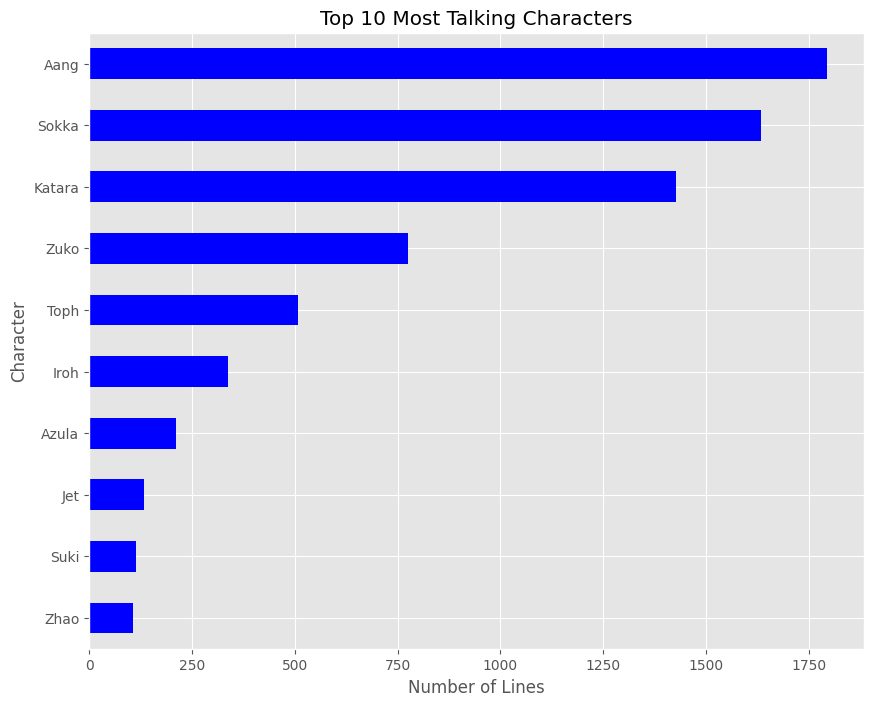

In [57]:
# Filters to the top 10 most talking characters
top_10_talking = character_counts.head(10)

# 10 Most talkative characters (horizontal bar plot)

plt.figure(figsize=(10, 8))
top_10_talking.plot(kind='barh', color='blue')
plt.xlabel('Number of Lines')
plt.ylabel('Character')
plt.title('Top 10 Most Talking Characters')
plt.gca().invert_yaxis()
plt.show()




###### Emotion Distrubution Pie chart

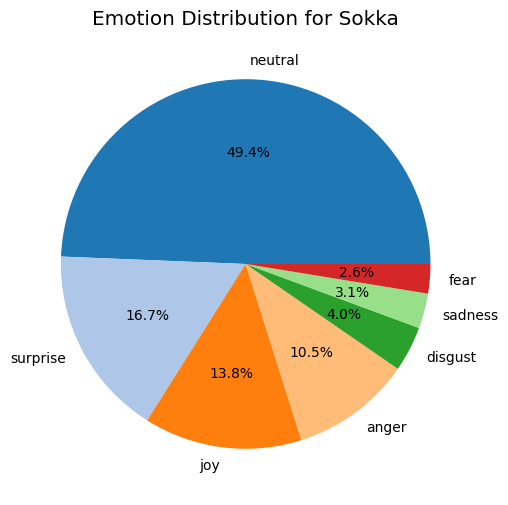

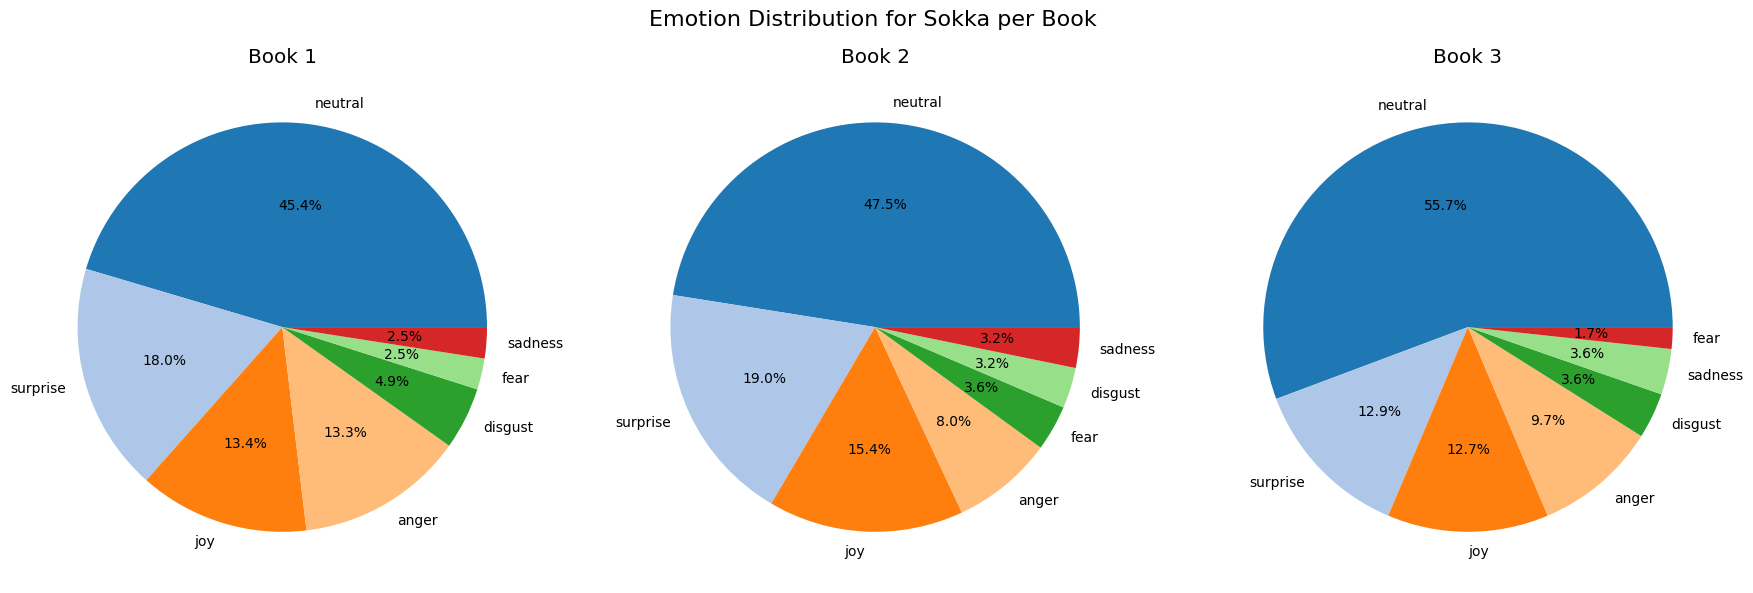

In [58]:
# Plot emotion distribution for Sokka
plot_emotion_pie_distribution(df, 'Sokka', 'Emotion_Sokka_Label')
plot_emotion_pie_distribution_per_book(df, 'Sokka', 'Emotion_Sokka_Label')


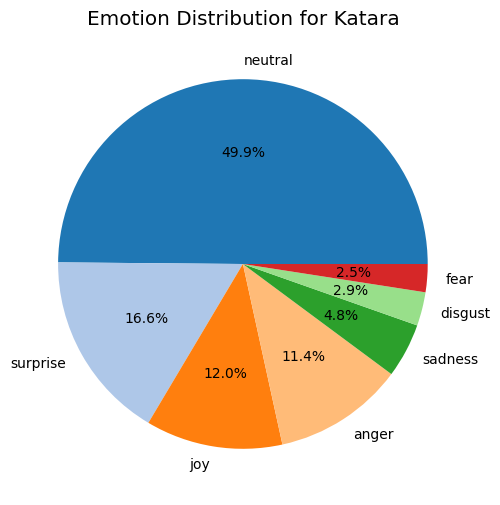

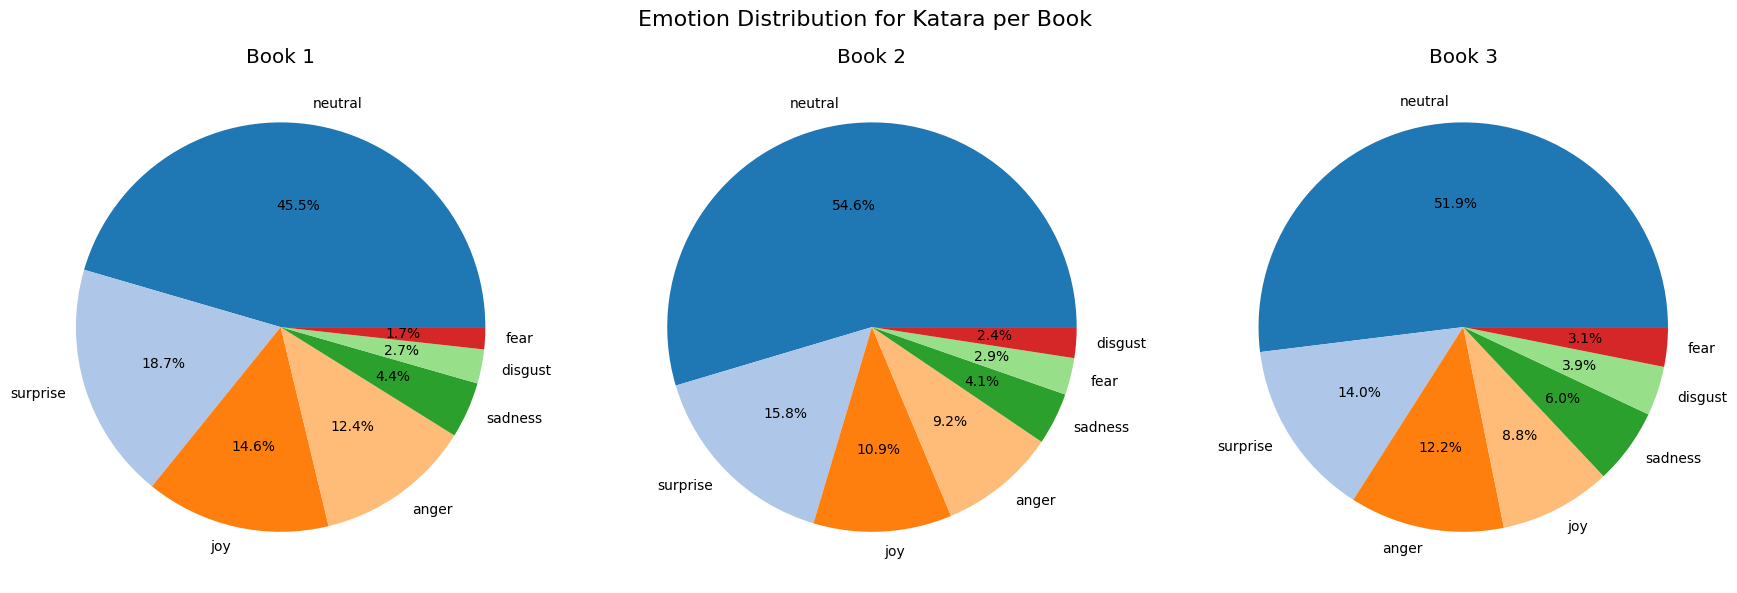

In [59]:
# Plot emotion distribution for Katara
plot_emotion_pie_distribution(df, 'Katara', 'Emotion_Katara_Label')
plot_emotion_pie_distribution_per_book(df, 'Katara', 'Emotion_Katara_Label')

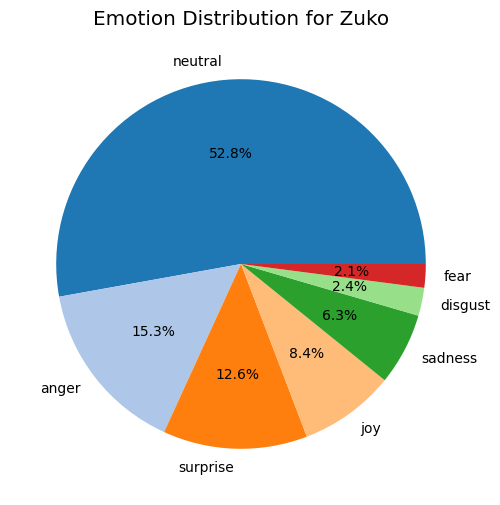

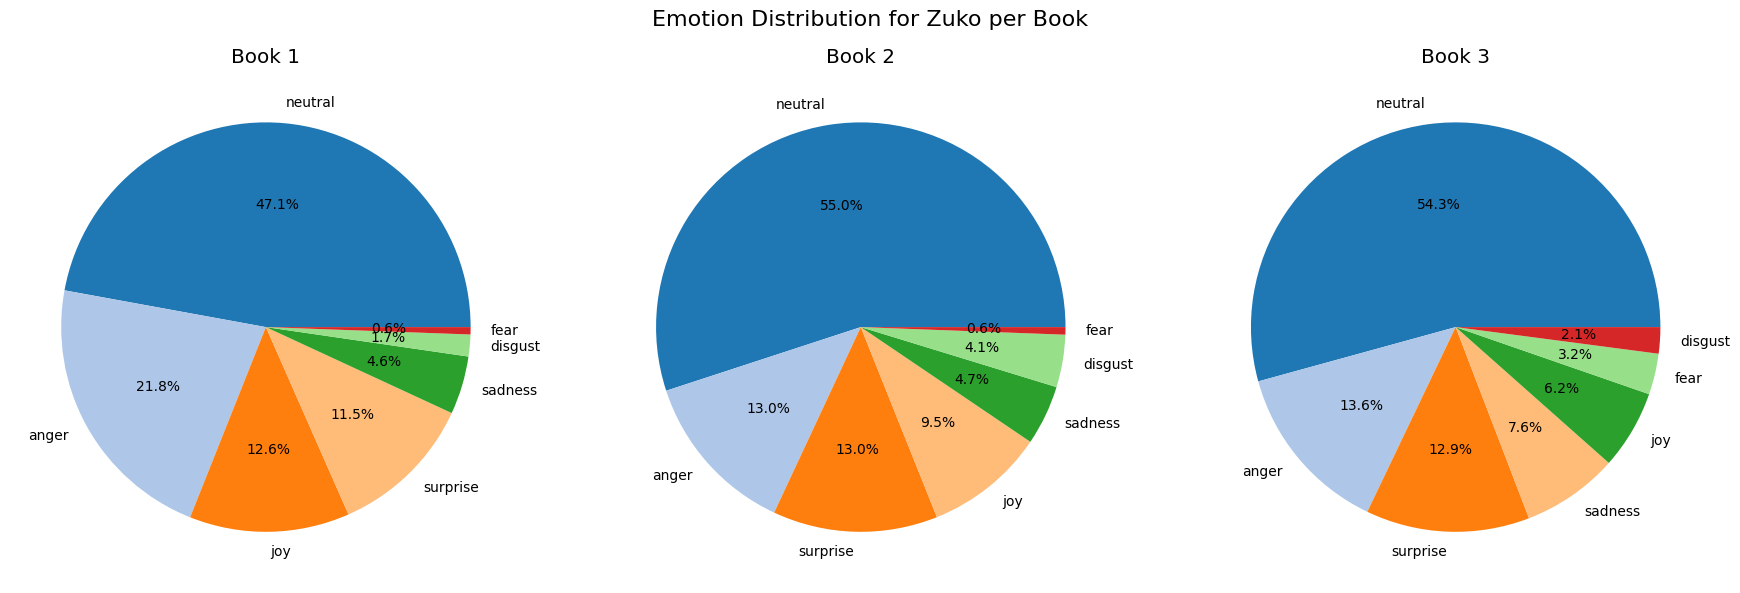

In [60]:
# Plot emotion distribution for Zuko
plot_emotion_pie_distribution(df, 'Zuko', 'Emotion_Zuko_Label')
plot_emotion_pie_distribution_per_book(df, 'Zuko', 'Emotion_Zuko_Label')

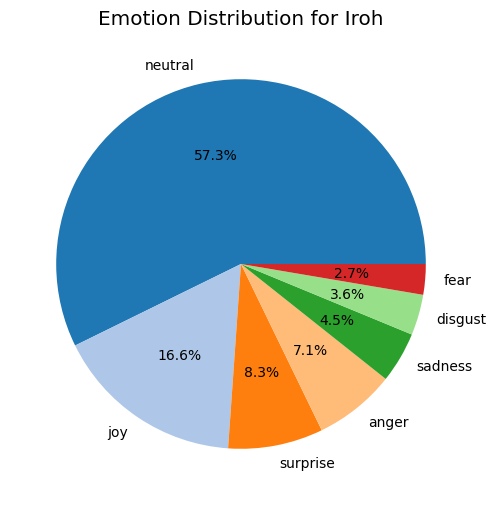

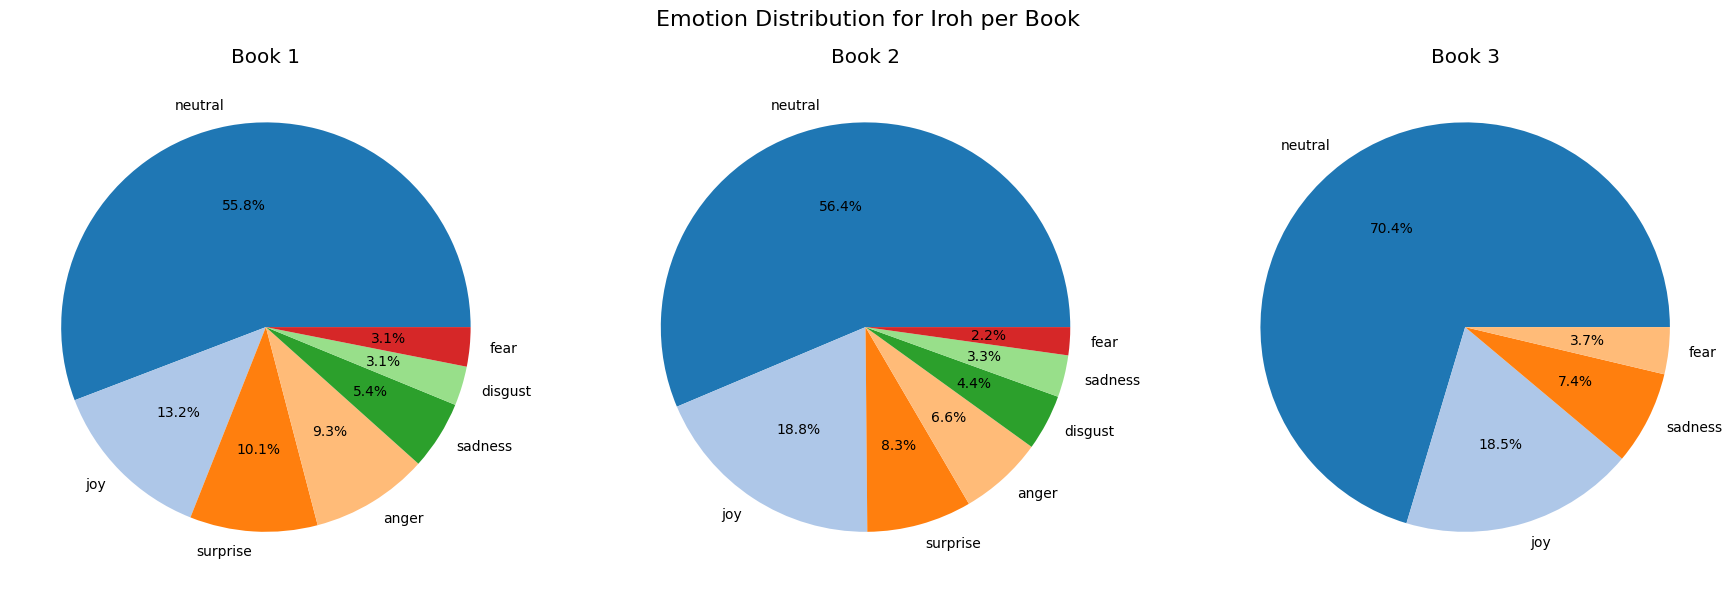

In [61]:
# Plot emotion distribution for Iroh
plot_emotion_pie_distribution(df, 'Iroh', 'Emotion_Iroh_Label')
plot_emotion_pie_distribution_per_book(df, 'Iroh', 'Emotion_Iroh_Label')

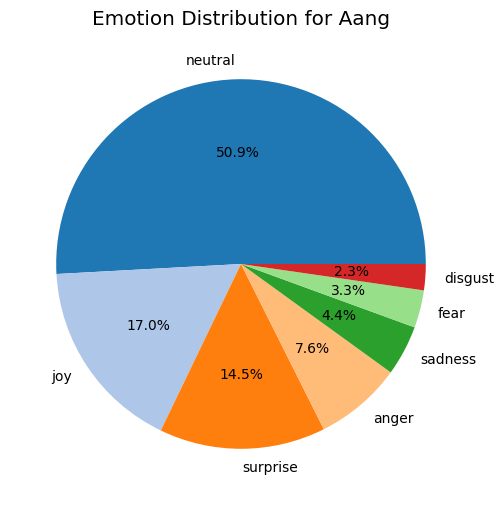

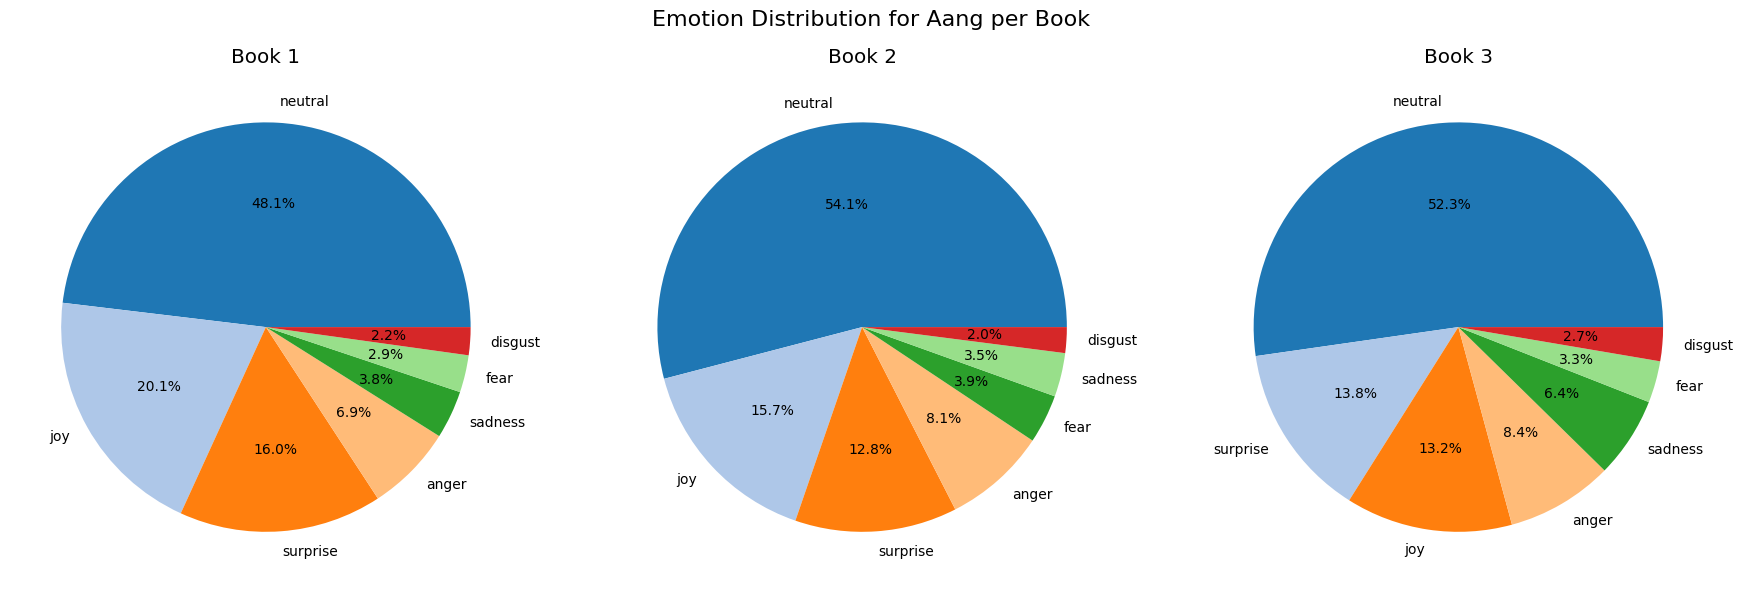

In [62]:
# Plot emotion distribution for Aang
plot_emotion_pie_distribution(df, 'Aang', 'Emotion_Aang_Label')
plot_emotion_pie_distribution_per_book(df, 'Aang', 'Emotion_Aang_Label')

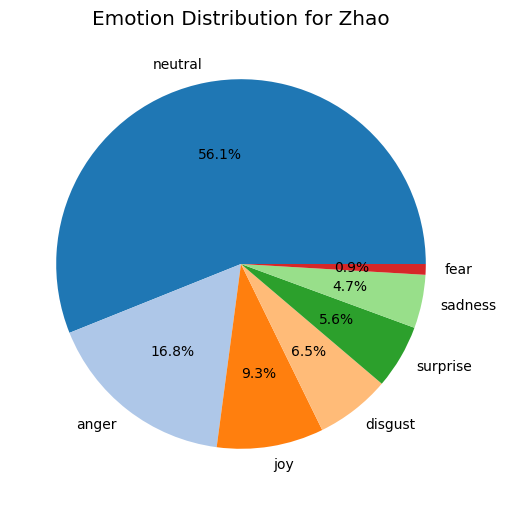

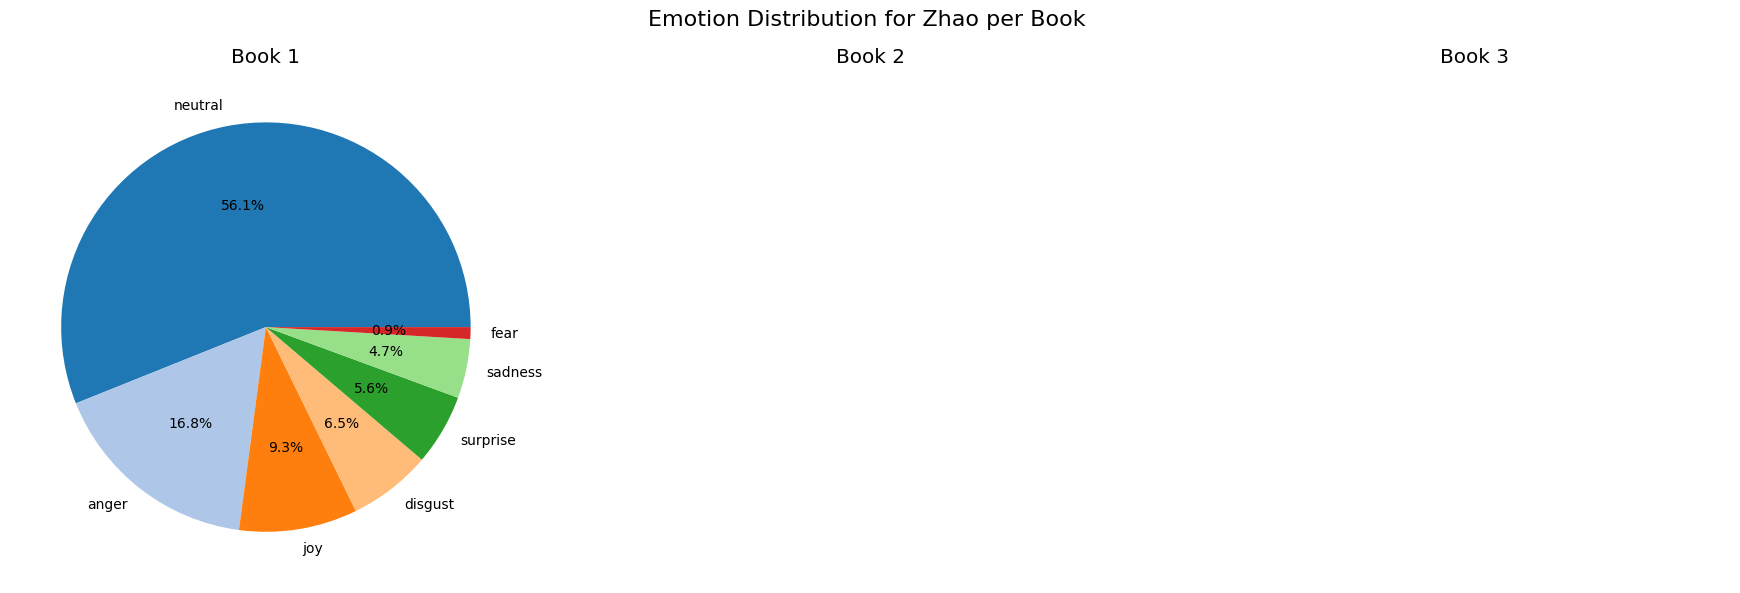

In [63]:
# Plot emotion distribution for zhoa
plot_emotion_pie_distribution(df, 'Zhao', 'Emotion_Zhao_Label')
plot_emotion_pie_distribution_per_book(df, 'Zhao', 'Emotion_Zhao_Label')

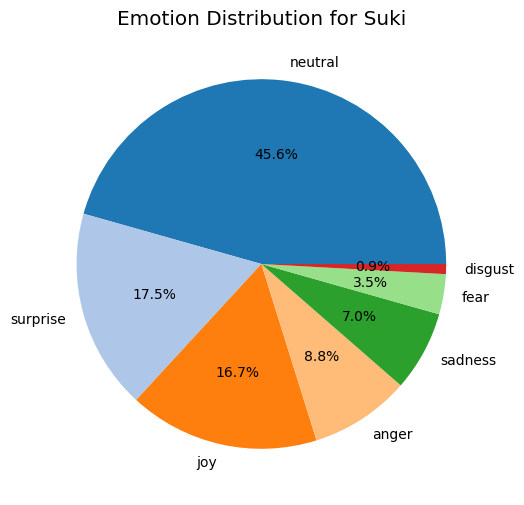

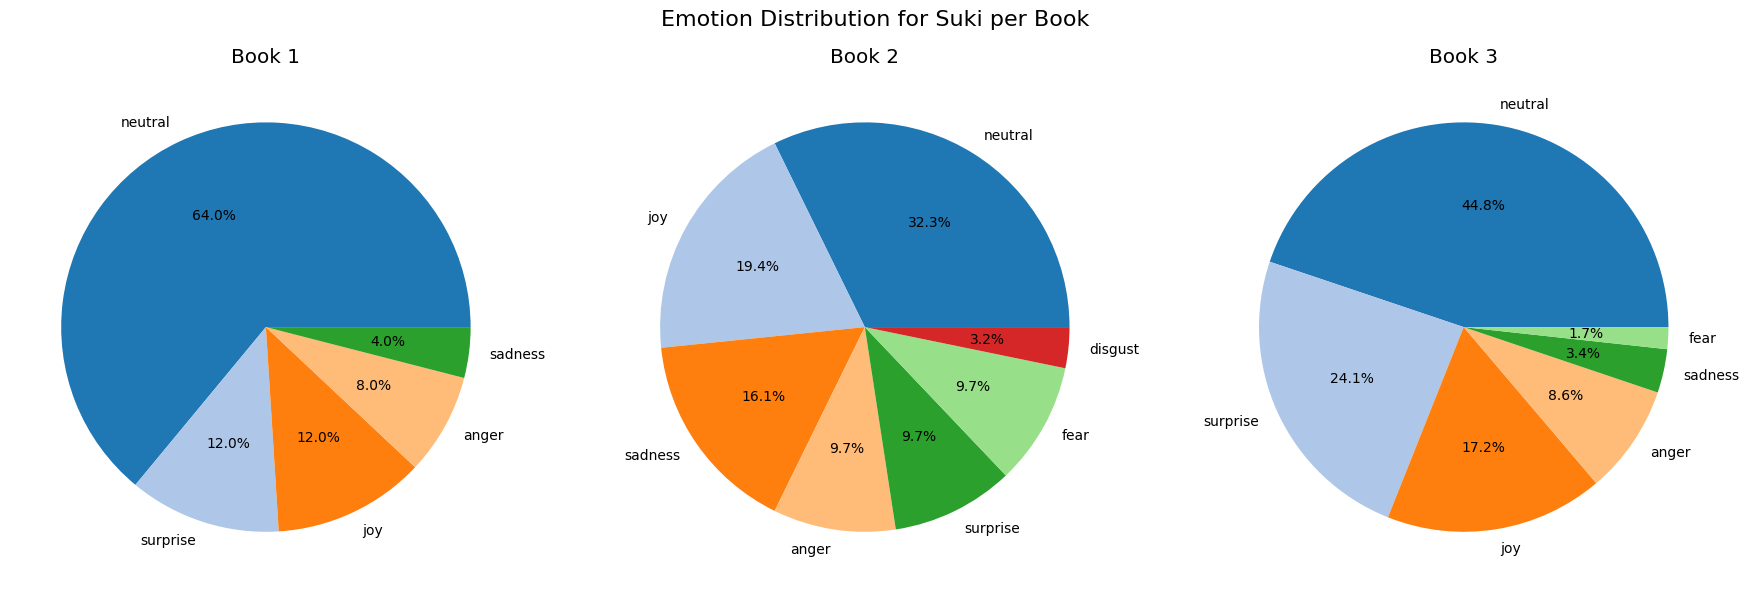

In [64]:
# Plot emotion distribution for suki
plot_emotion_pie_distribution(df, 'Suki', 'Emotion_Suki_Label')
plot_emotion_pie_distribution_per_book(df, 'Suki', 'Emotion_Suki_Label')

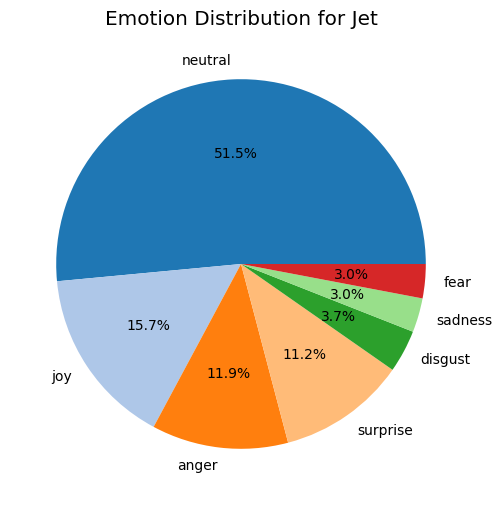

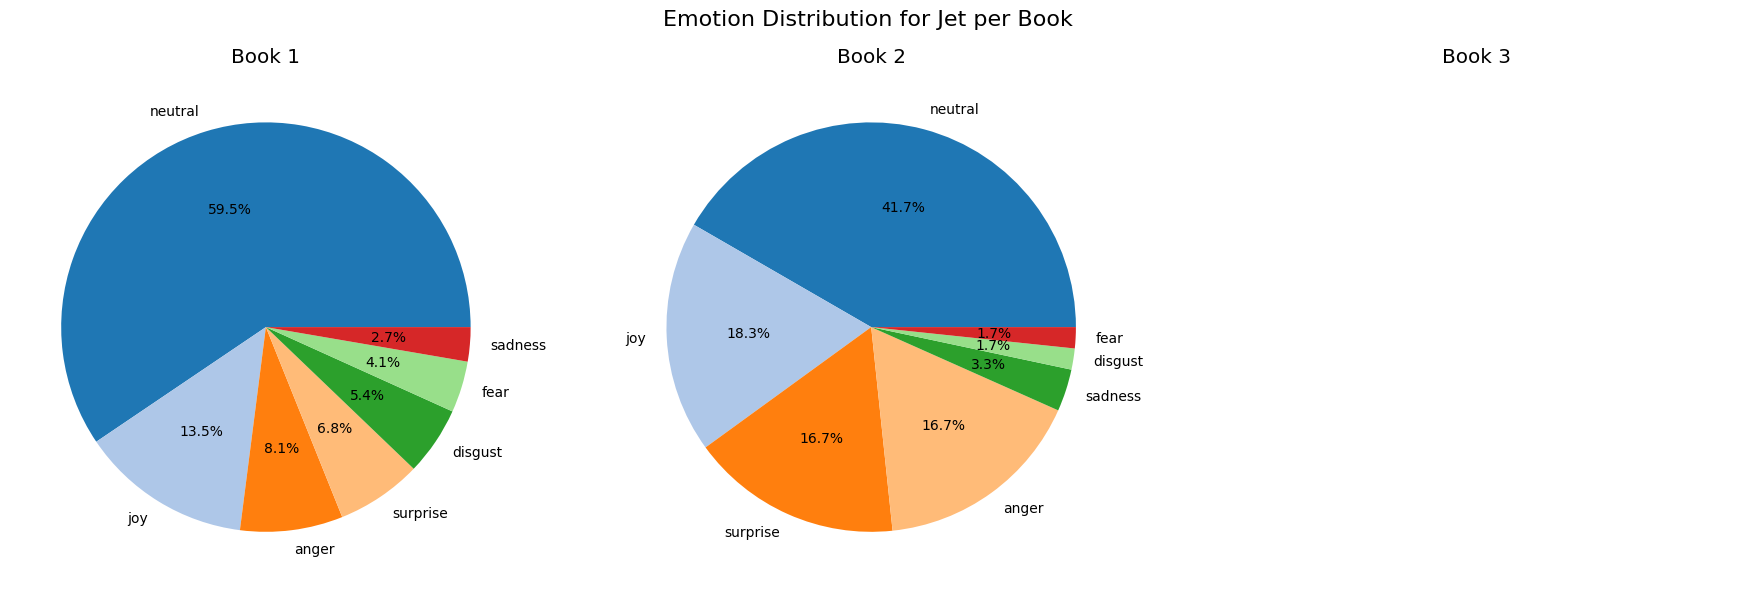

In [65]:
# Plot emotion distribution for jet
plot_emotion_pie_distribution(df, 'Jet', 'Emotion_Jet_Label')
plot_emotion_pie_distribution_per_book(df,'Jet', 'Emotion_Jet_Label')

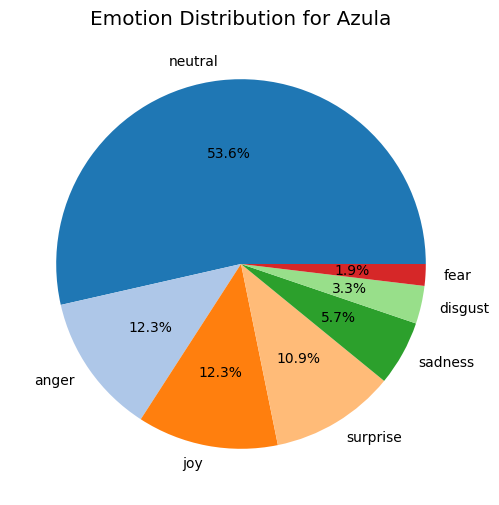

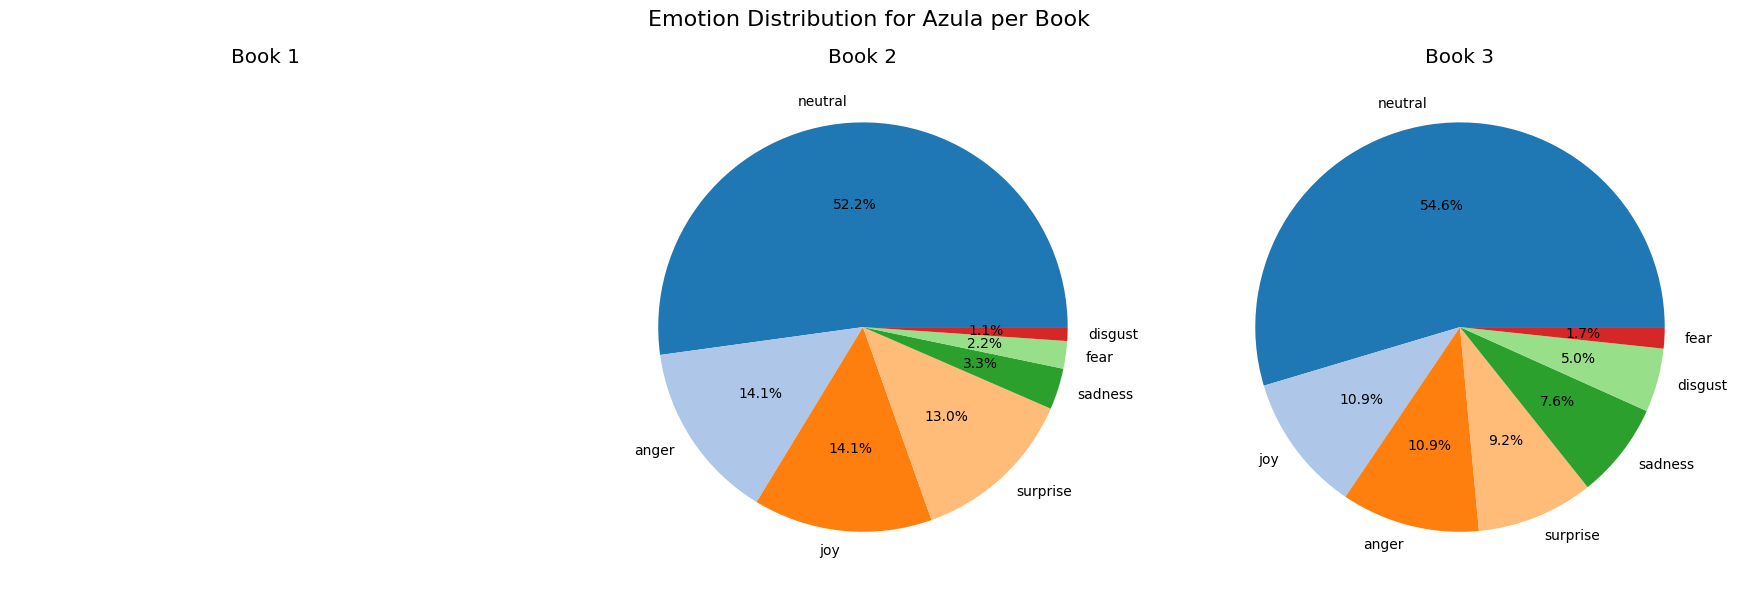

In [66]:
# Plot emotion distribution for azula
plot_emotion_pie_distribution(df, 'Azula', 'Emotion_Azula_Label')
plot_emotion_pie_distribution_per_book(df, 'Azula', 'Emotion_Azula_Label')

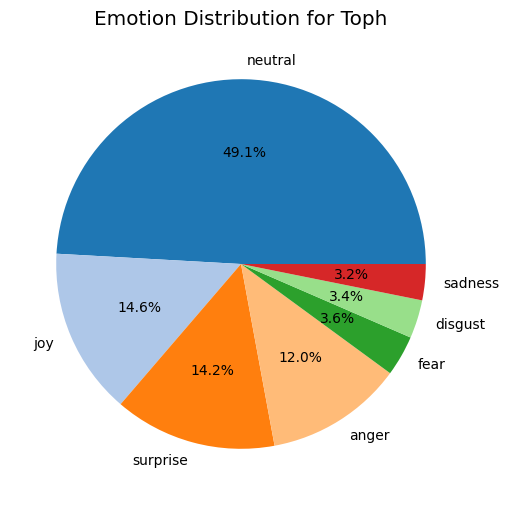

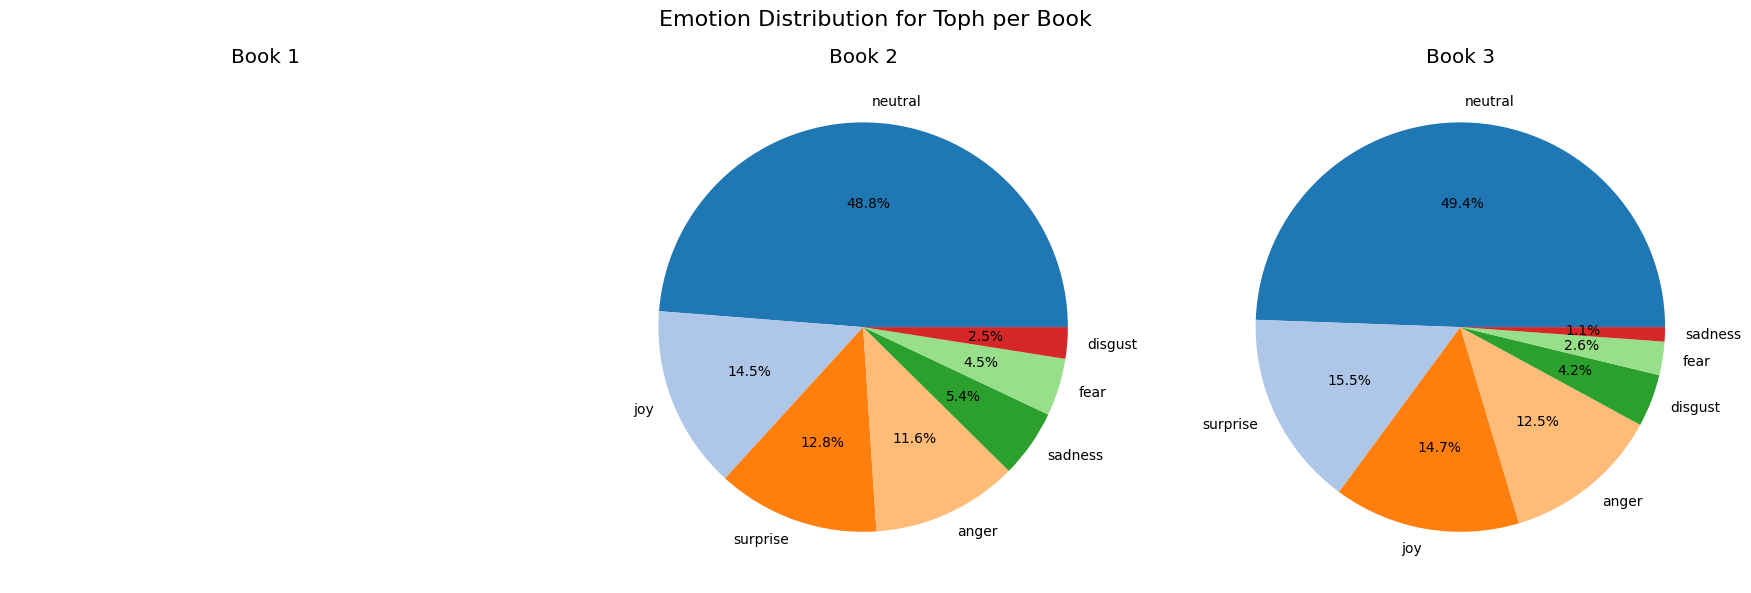

In [67]:
# Plot emotion distribution for Toph
plot_emotion_pie_distribution(df, 'Toph', 'Emotion_Toph_Label')
plot_emotion_pie_distribution_per_book(df,'Toph', 'Emotion_Toph_Label')

###### Emotion Trends over Seasons

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


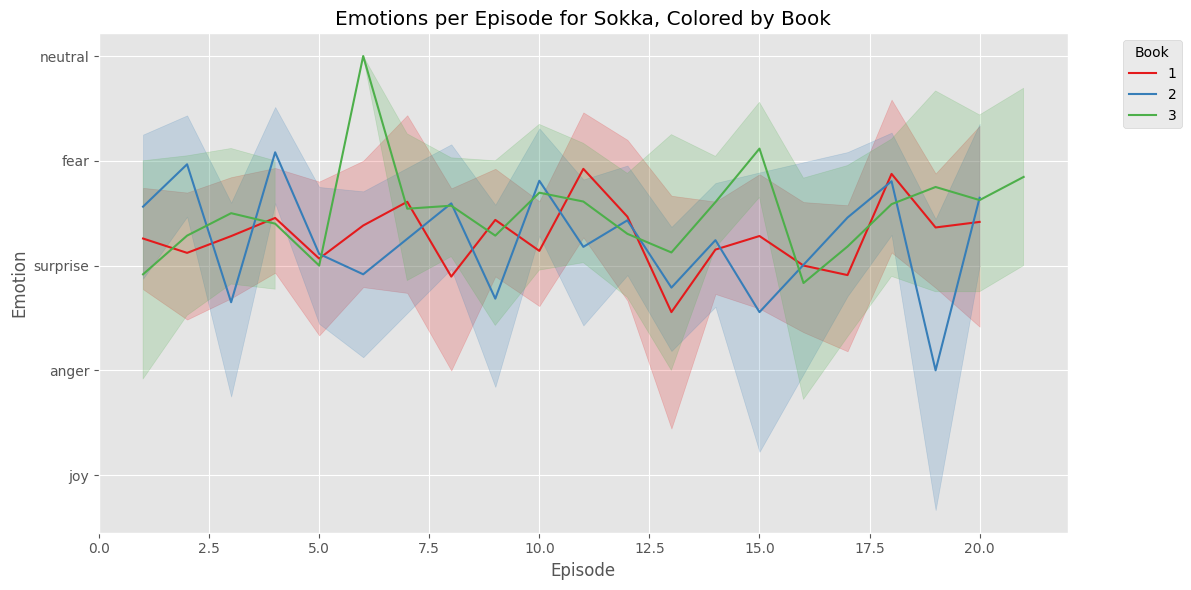

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


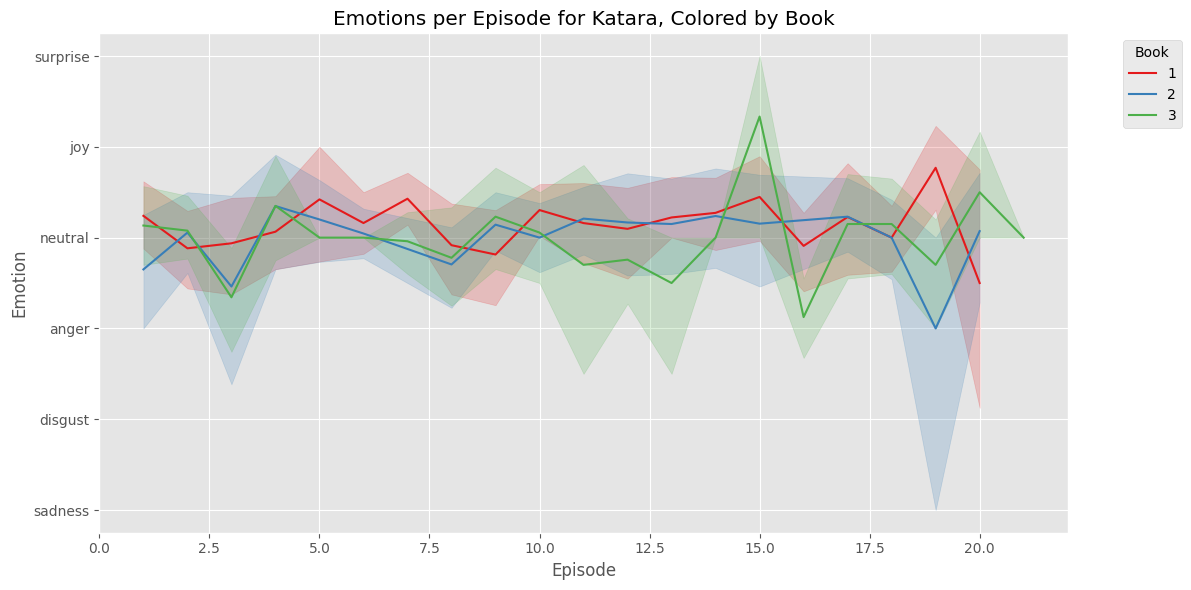

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


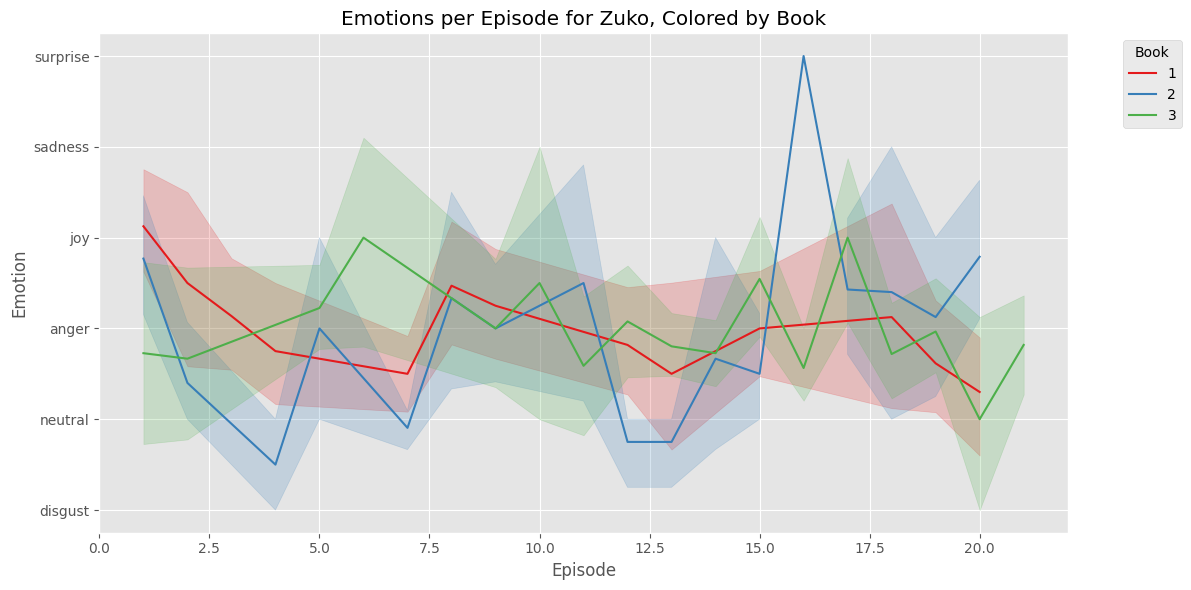

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


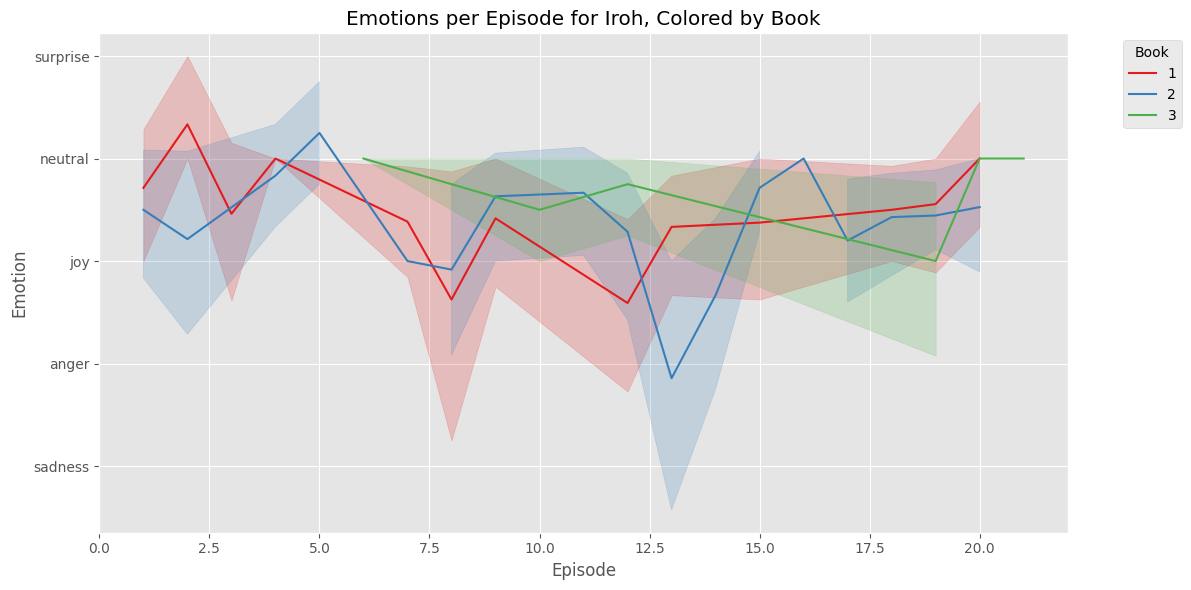

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


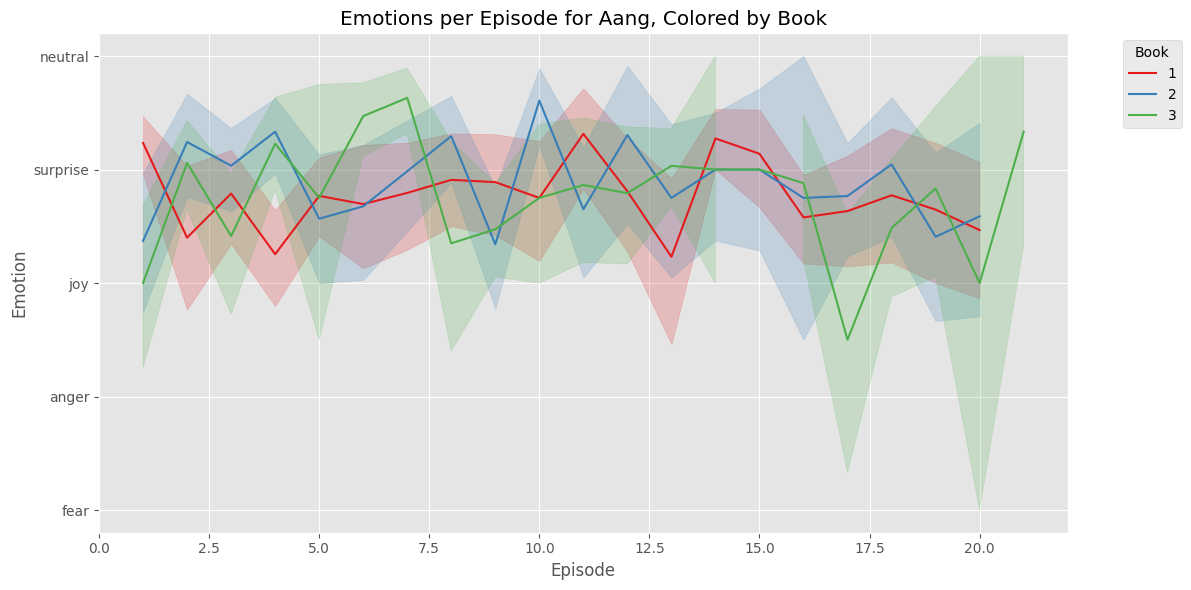

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


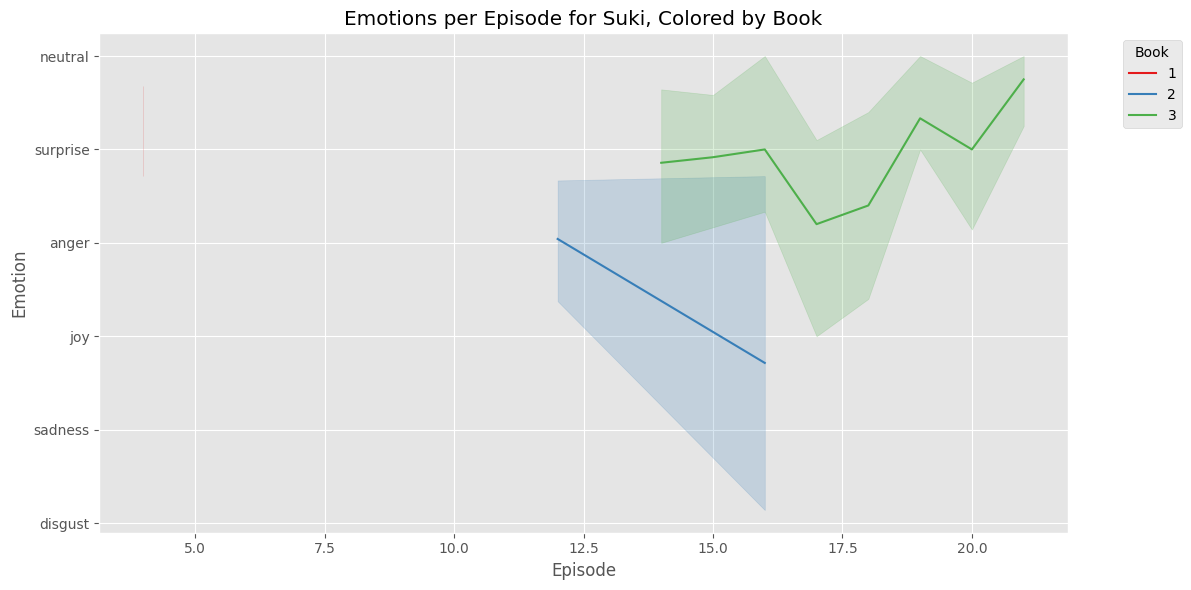

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


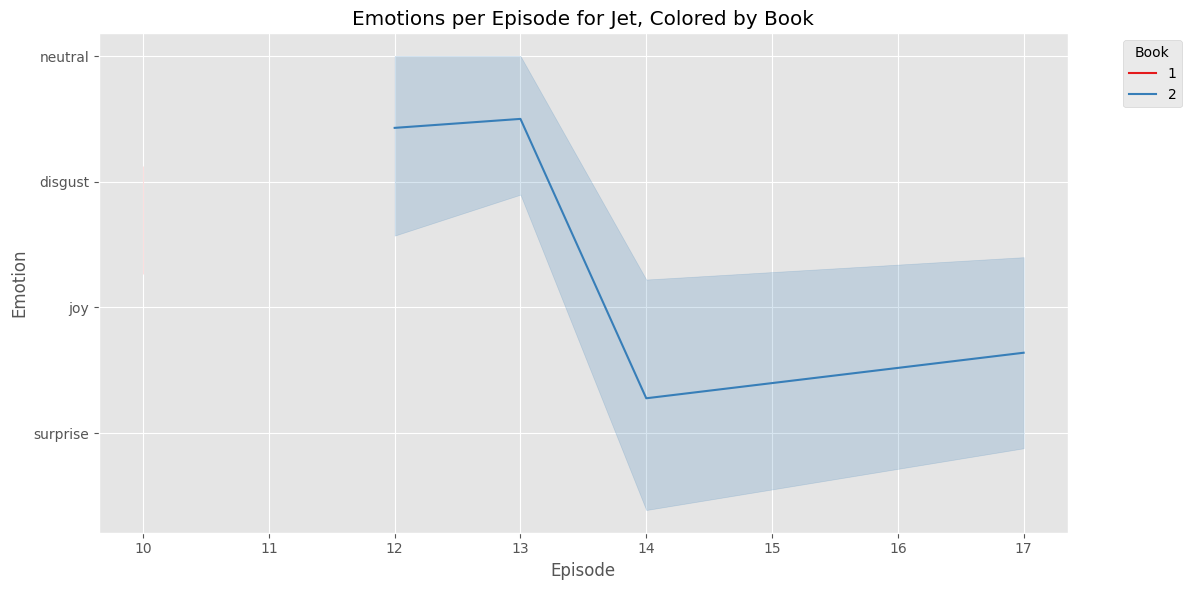

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


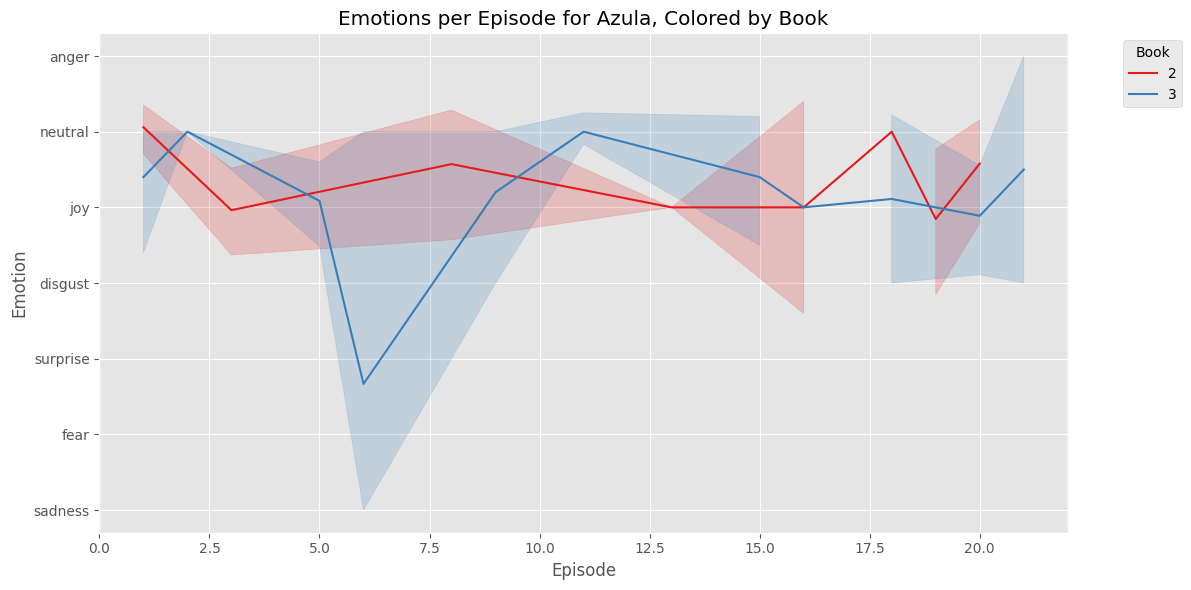

<ipython-input-68-10b0005f3350>:11: UserWarning: The palette list has more values (9) than needed (2), which may not be intended.
  sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)


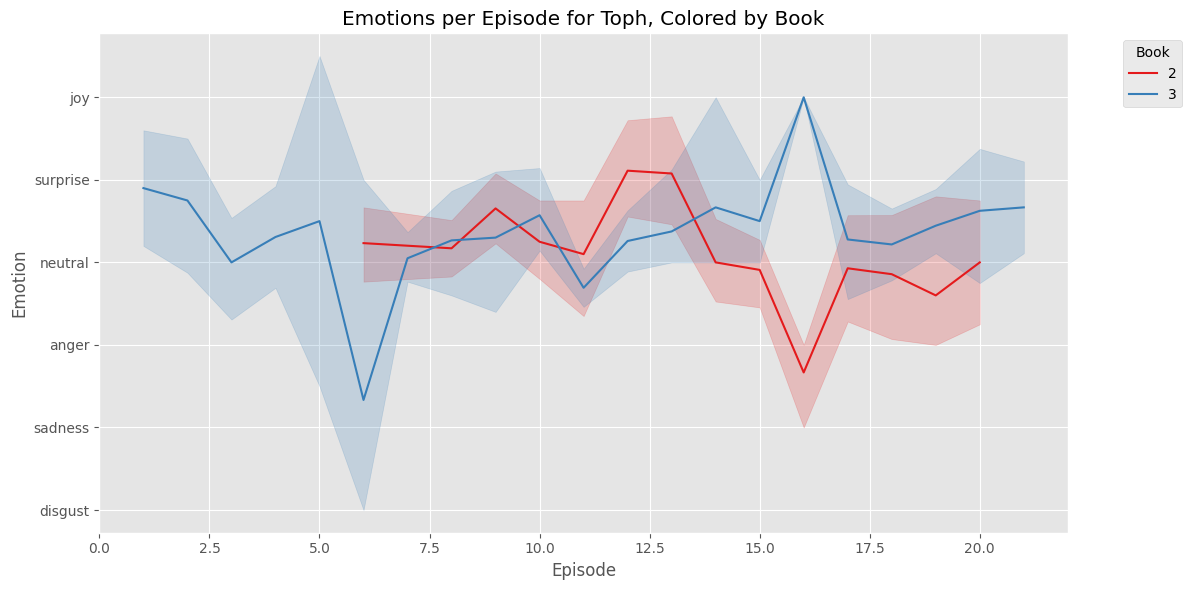

In [68]:

# Plot emotions trends for each character per Book
set1_palette = sns.color_palette("Set1")
for character in character_list:
    emotion_column = f'Emotion_{character}_Label'
    character_df = emo_df[emo_df['Character'] == character]
    emotion_column = f'Emotion_{character}_Label'
    character_df = emo_df[emo_df['Character'] == character]

    # Plot emotions per episode for the character with brighter colors
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=character_df, x='ep_number', y=emotion_column, hue='Book', palette= set1_palette, markers=True, dashes=False)
    plt.title(f'Emotions per Episode for {character}, Colored by Book')
    plt.xlabel('Episode')
    plt.ylabel('Emotion')
    plt.legend(title='Book', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

###### Emotion Frequency Bar Plot

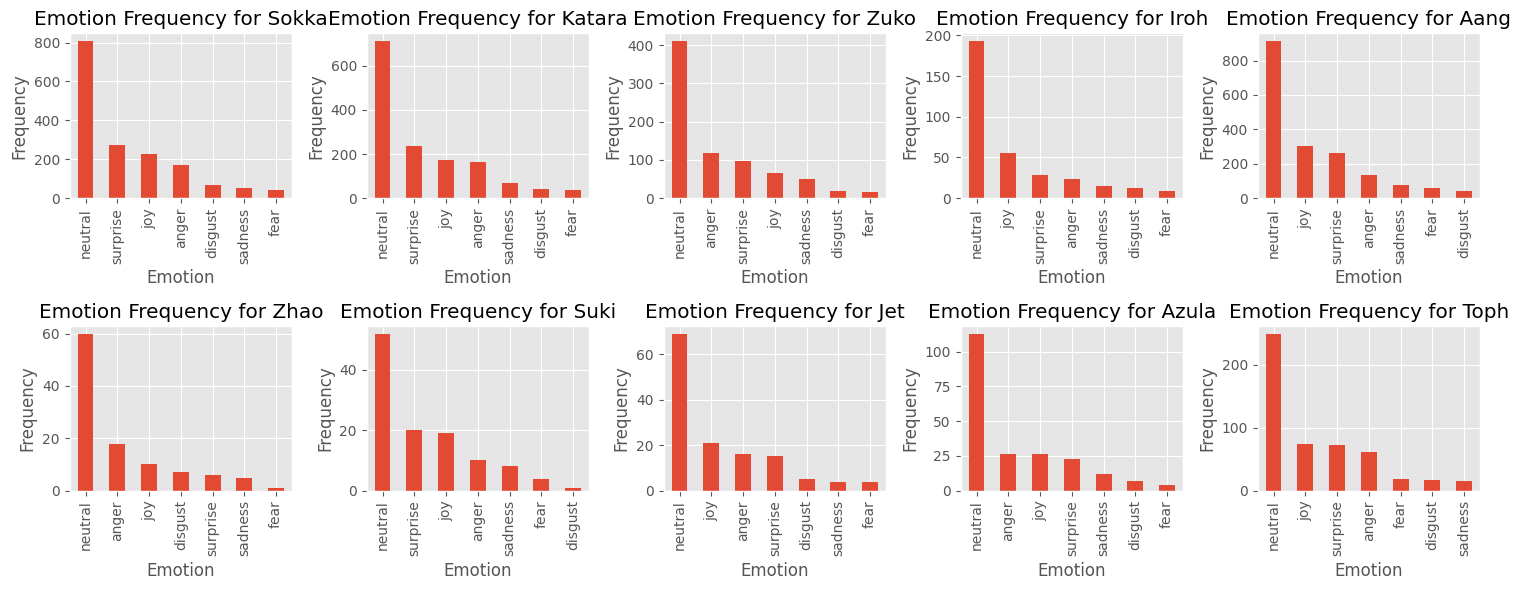

In [75]:
 # Plot the frequency of each emotion label and define the characters and their corresponding emotion labels

characters = ['Sokka', 'Katara', 'Zuko', 'Iroh', 'Aang', 'Zhao', 'Suki', 'Jet', 'Azula', 'Toph']
emotion_labels = ['Emotion_Sokka_Label', 'Emotion_Katara_Label', 'Emotion_Zuko_Label', 'Emotion_Iroh_Label', 'Emotion_Aang_Label', 'Emotion_Zhao_Label', 'Emotion_Suki_Label', 'Emotion_Jet_Label', 'Emotion_Azula_Label', 'Emotion_Toph_Label']


num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))

# Subplots for each character's emotion bar frequency
for i, ax in enumerate(axes.flat):
    if i < len(characters):
        plot_emotion_bar_frequency(df, emotion_labels[i], characters[i], ax=ax)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()



###### Word Blob Visualization

In [91]:

def plot_processed_word_clouds(character_list, df):
    fig, axes = plt.subplots(1, len(character_list), figsize=(25, 6))

    # Generate word clouds for each character
    for i, character in enumerate(character_list):
        string_script = combine_character_script(df, character, 'Processed_Script')
        wordcloud = WordCloud(width=400, height=200, background_color='white', colormap='viridis').generate(string_script)
        # Plot
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].set_title(f'Word Cloud for {character}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()



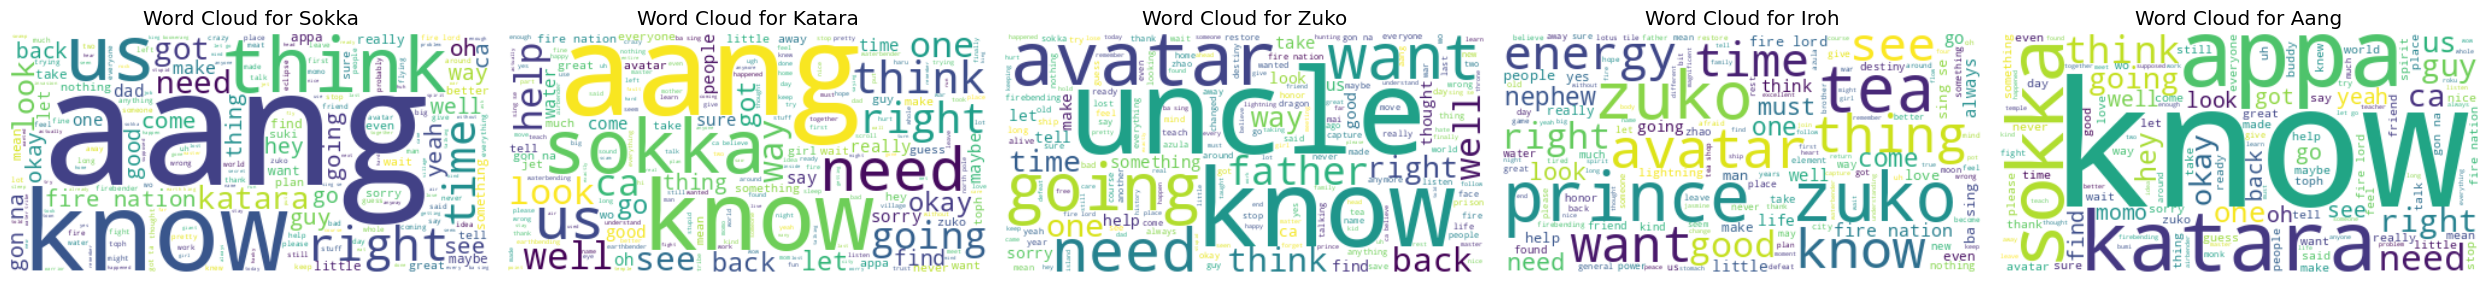

In [94]:
#Word Cloud
plot_processed_word_clouds(characters[:5], df)

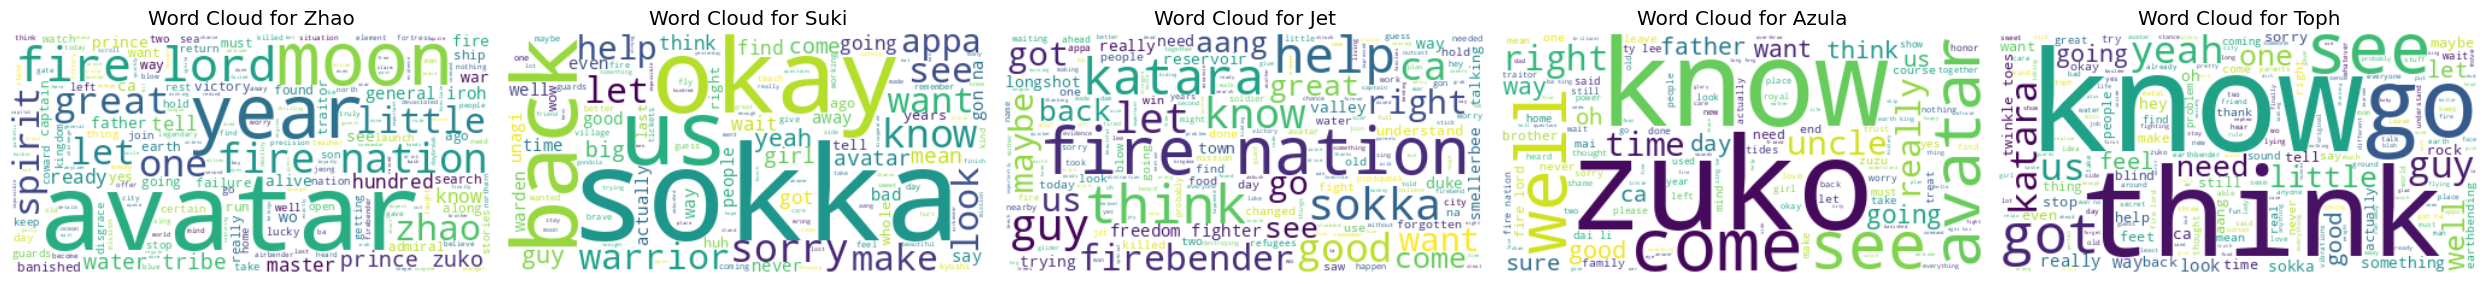

In [95]:
plot_processed_word_clouds(characters[5:], df)

###### Sentiment of Characters over Seasons

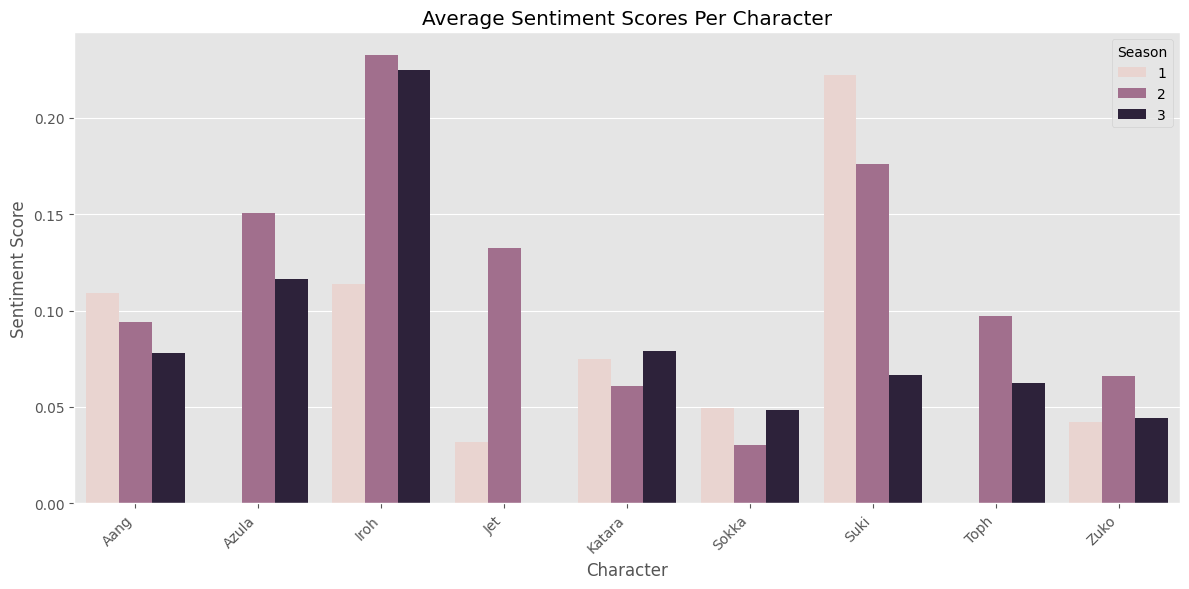

In [118]:
# Overall Sentiment scores of Characters Over Seasons

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Character',
    y='Sentiment_Processed_Script',
    hue='Book',
    data=df.query('Character in @character_list').groupby(['Character', 'Book'])['Sentiment_Processed_Script'].mean().reset_index()
)
plt.title('Average Sentiment Scores Per Character')
plt.xlabel('Character')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

###### Subjectivity of Characters over Seasons

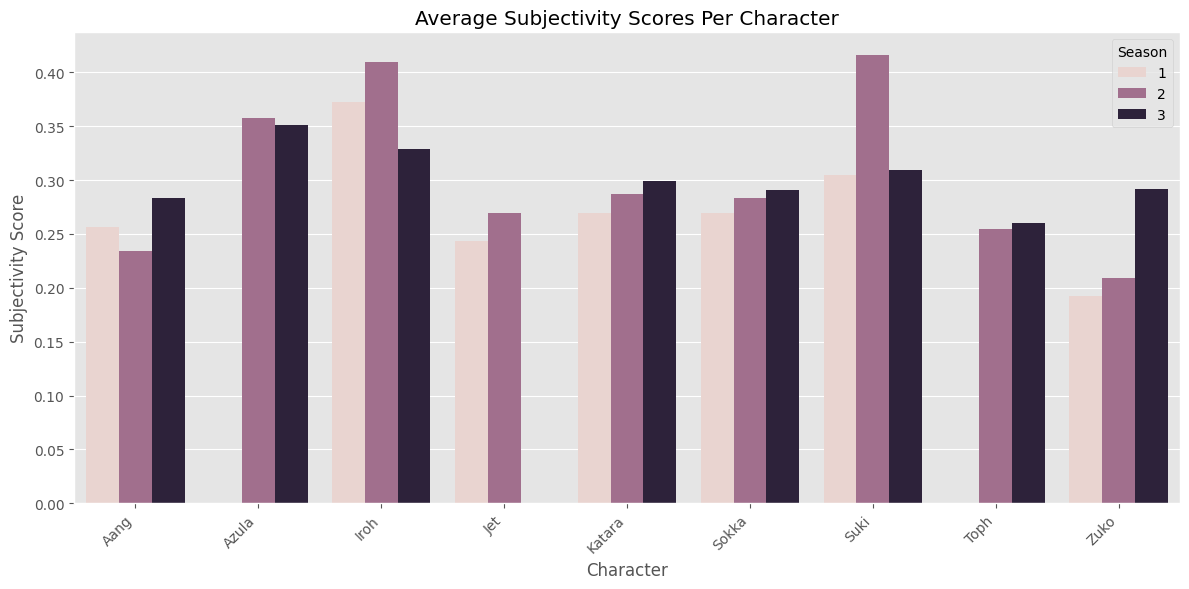

In [115]:
#Plotting Subjectivity of top 10 talking characters

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Character',
    y='Subjectivity_Processed_Script',
    hue='Book',
    data=df.query('Character in @character_list').groupby(['Character', 'Book'])['Subjectivity_Processed_Script'].mean().reset_index()
)
plt.title('Average Subjectivity Scores Per Character')
plt.xlabel('Character')
plt.ylabel('Subjectivity Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

###### Bar Plot for Sentiment Distrubution over Seasons
   

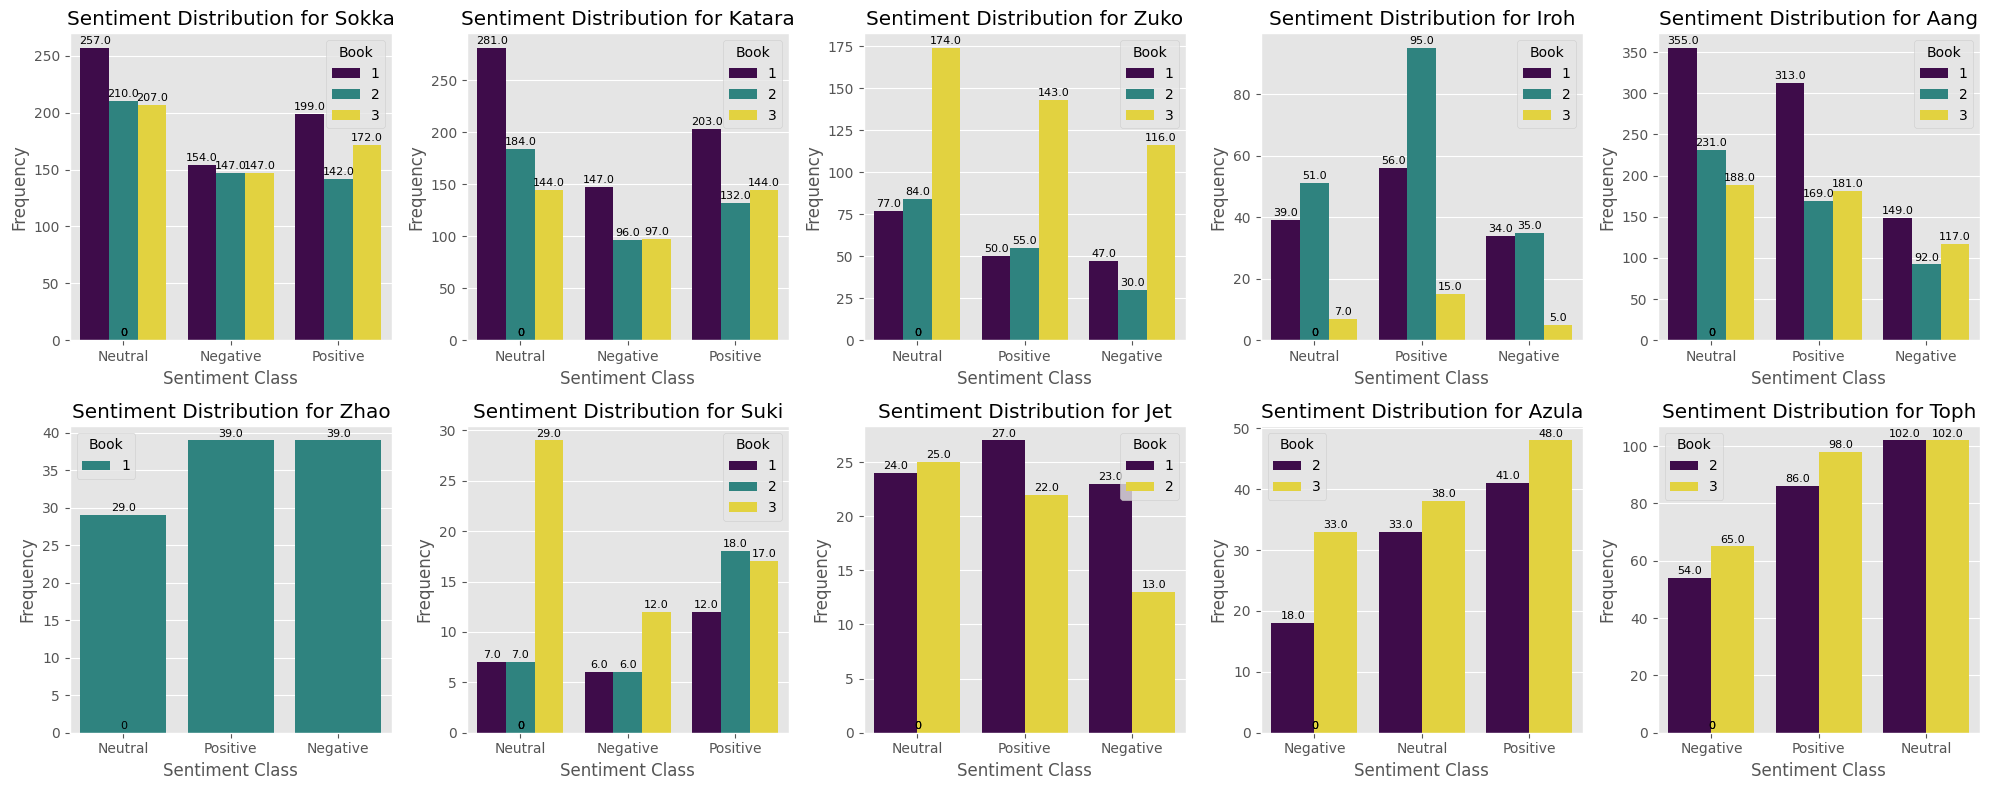

In [126]:
# Subplots for each character's sentiment class for lemmatized script
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

for i, ax in enumerate(axes.flat):
    if i < len(characters):
        plot_sentiment_distribution(df, 'Character', 'Sentiment_Class_Lemmatized', characters[i], ax=ax)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

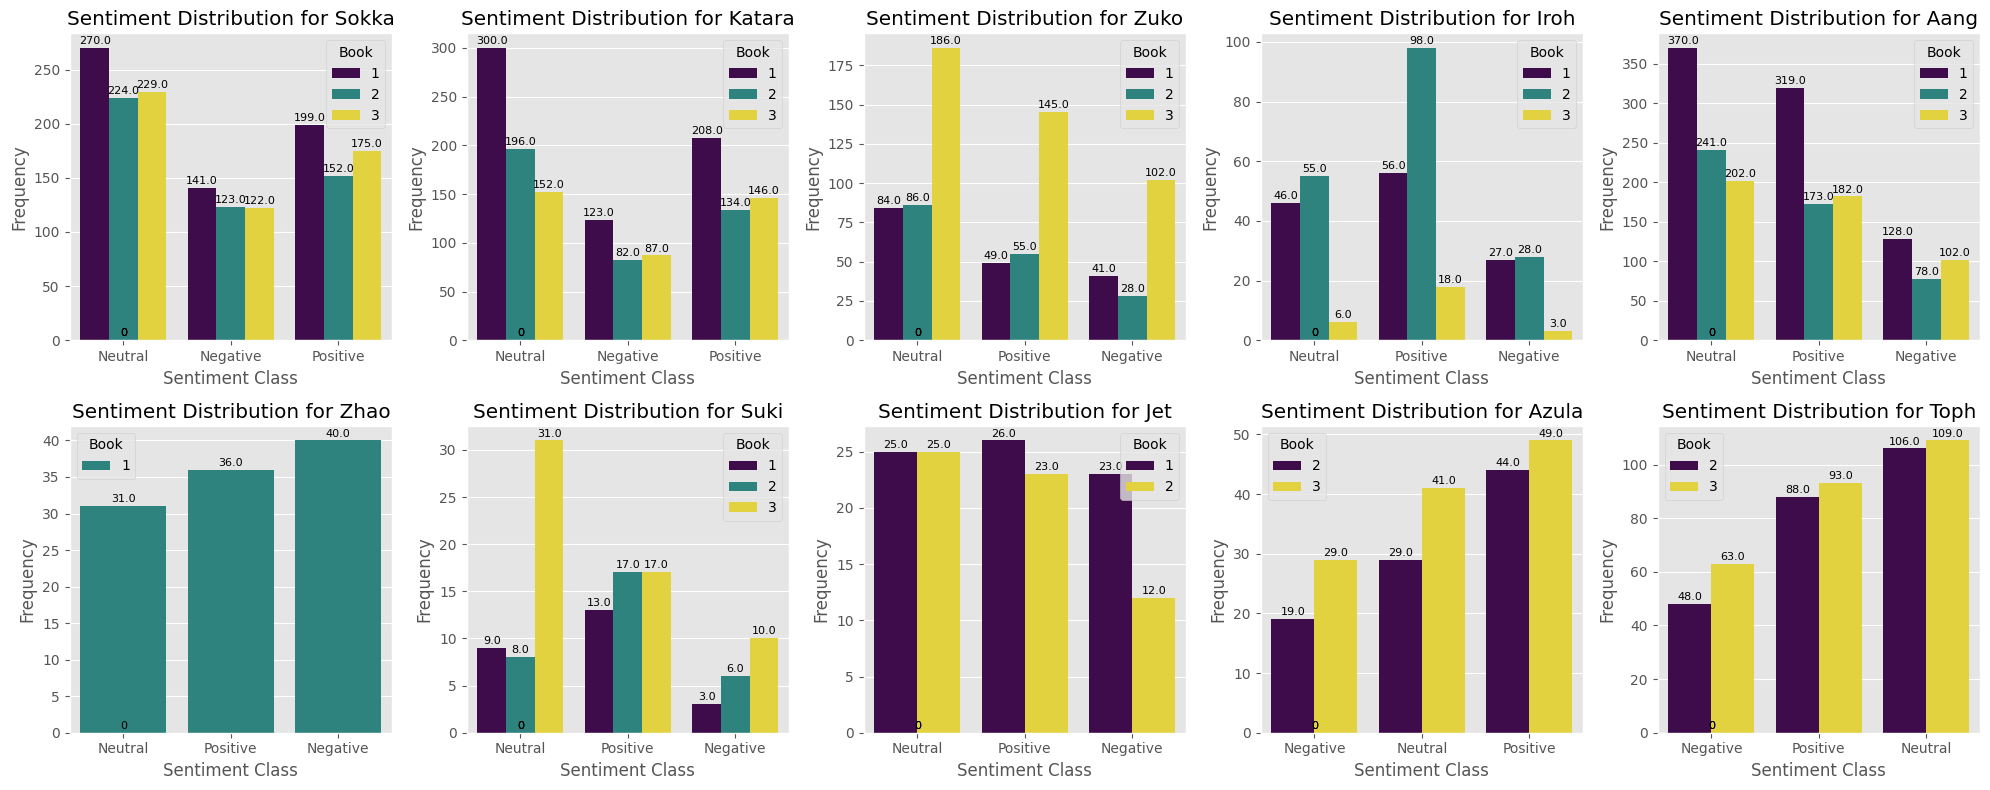

In [127]:

# Subplots for each character's sentiment class for processed script
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 8))

# Loop through characters and plot sentiment distribution
for i, ax in enumerate(axes.flat):
    if i < len(characters):
        plot_sentiment_distribution(df, 'Character', 'Sentiment_Class_Processed', characters[i], ax=ax)
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()



######Stacked Bar Plot for Subjectivity



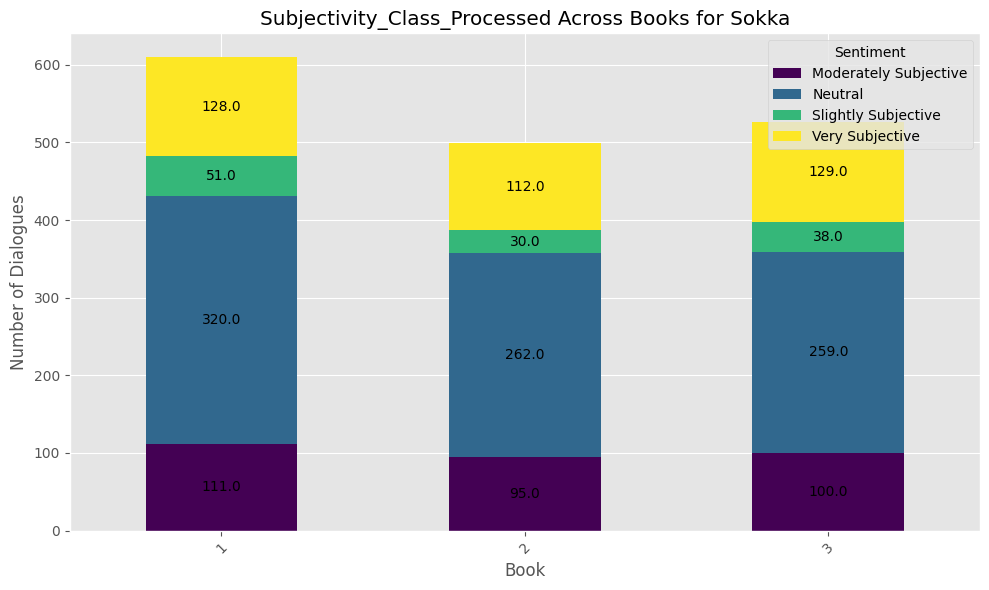

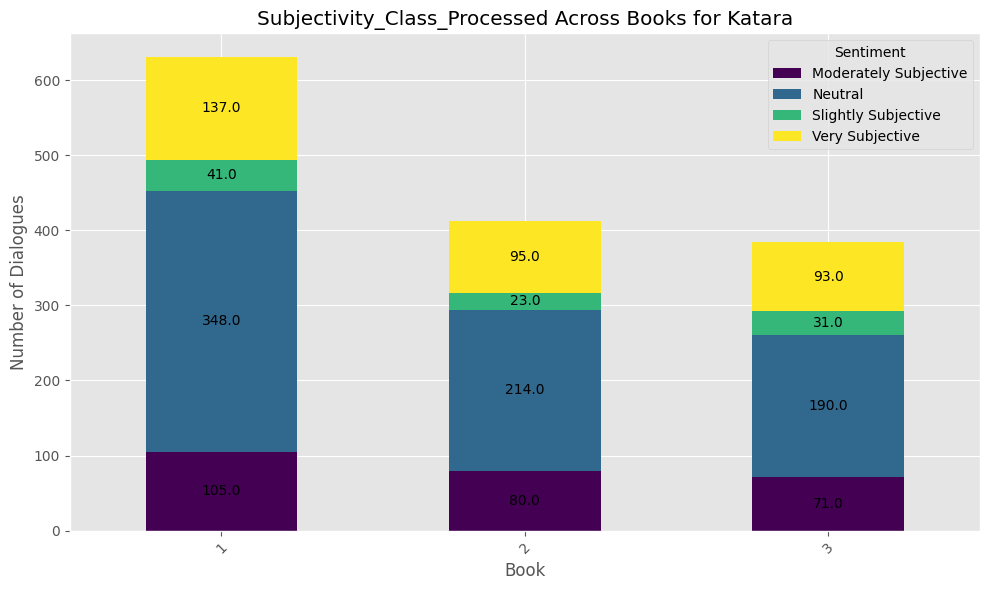

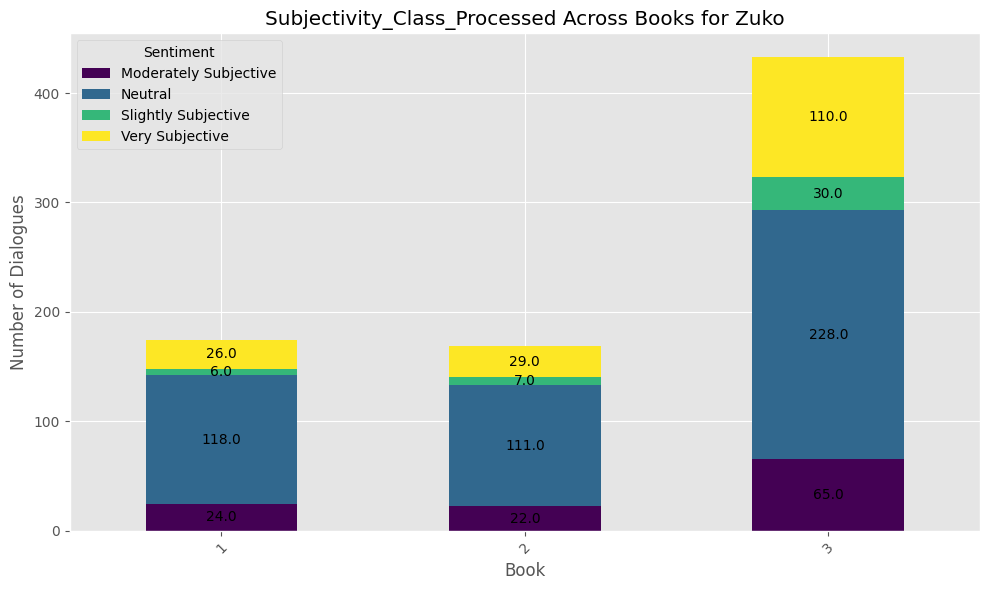

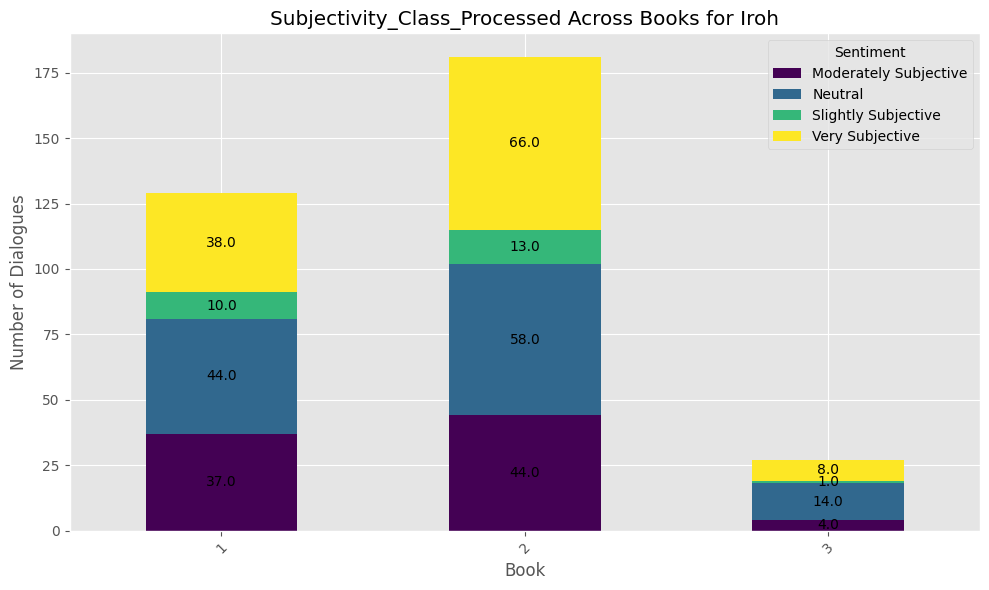

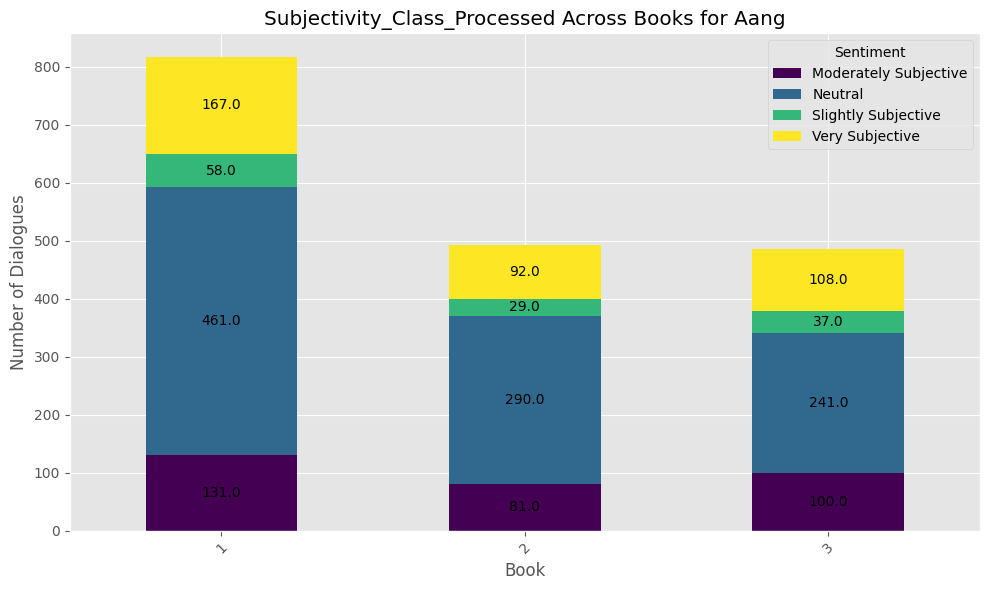

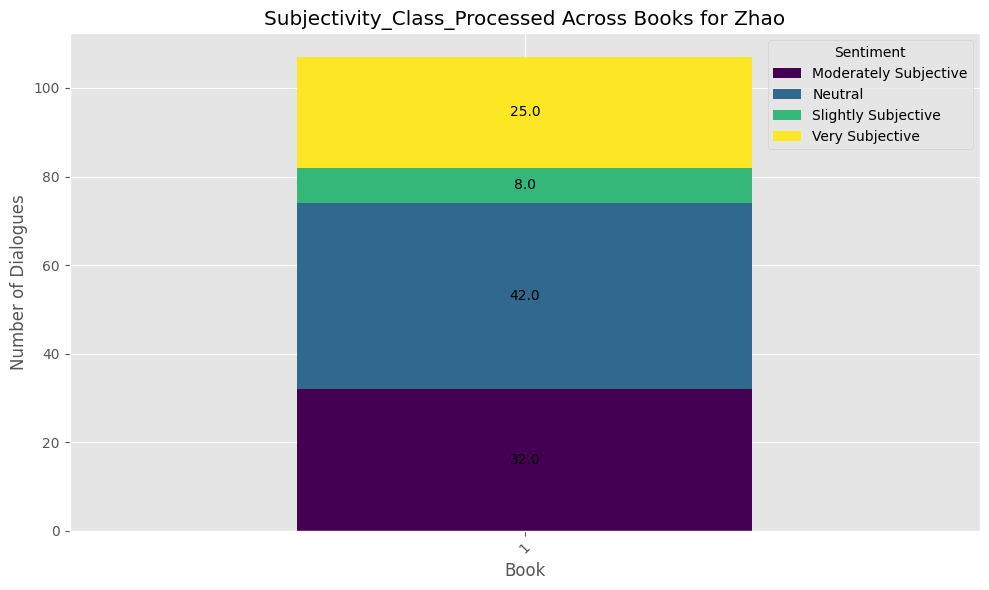

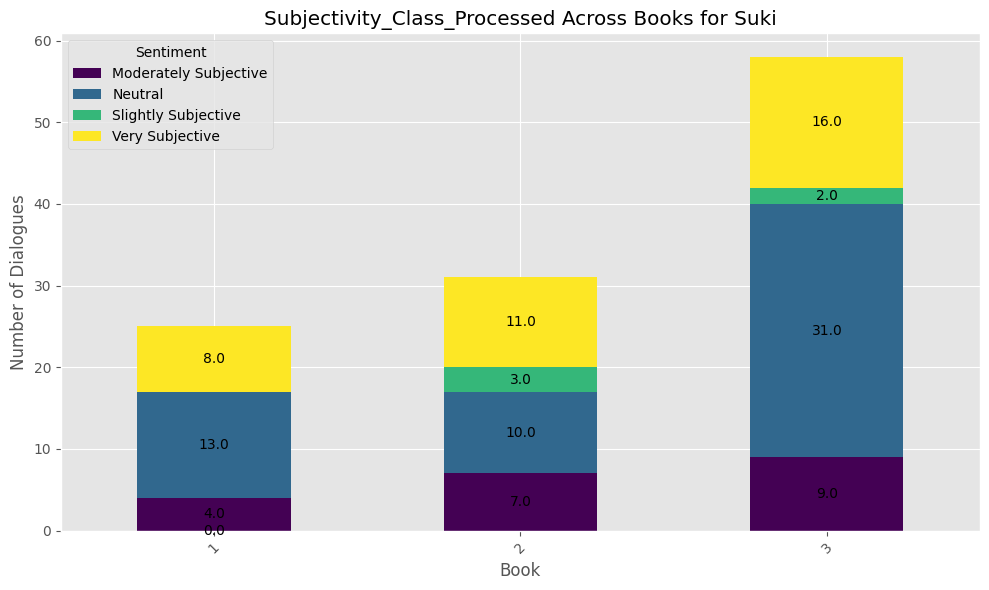

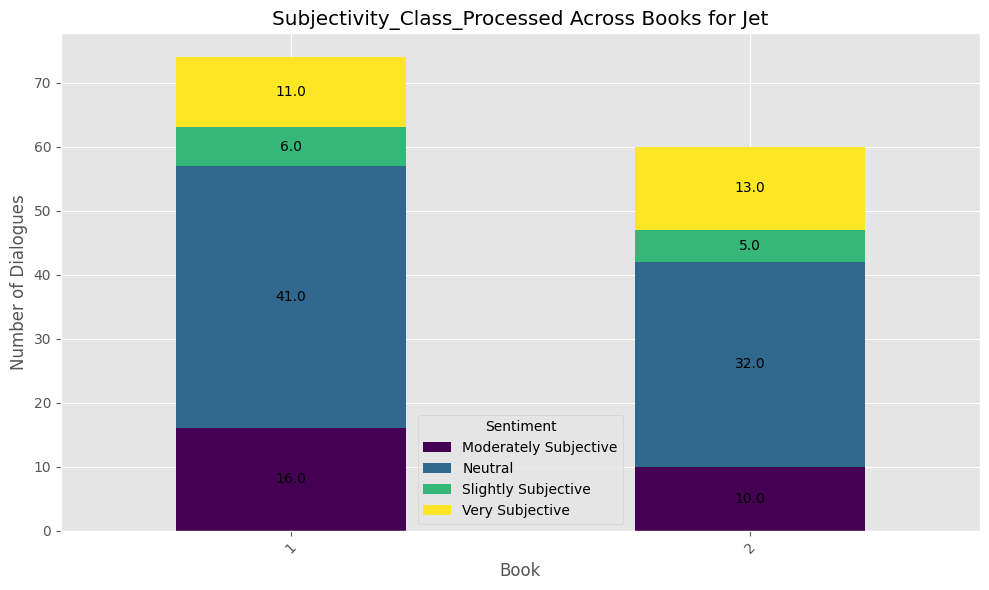

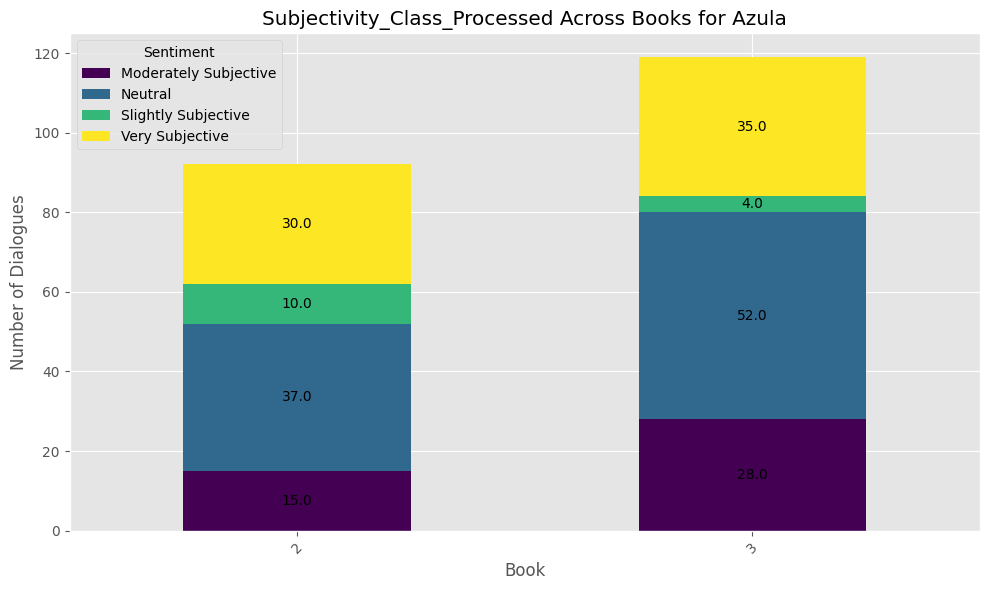

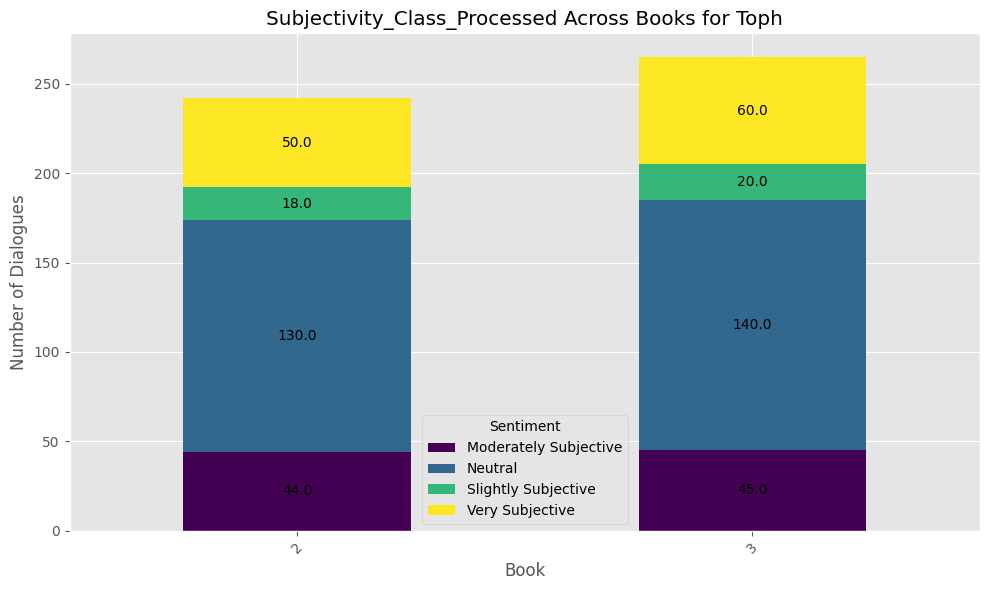

<Figure size 640x480 with 0 Axes>

In [144]:
# Subplots for each character's subjectivity class for lemmatized script

for i, ax in enumerate(axes.flat):
    if i < len(characters):
        sentiment_dist(characters[i], 'Subjectivity_Class_Processed')
        ax.set_title(f'Subjectivity Distribution for {characters[i]}')
        ax.set_ylabel('Frequency')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()



## Step 7 : Results


In [146]:
df.columns


Index(['Character', 'script', 'ep_number', 'Book', 'total_number',
       'Processed_Script', 'Stripped_Script', 'Lemmatized_Script',
       'WordCount_Script', 'Sentiment_Processed_Script',
       'Sentiment_Lemmatized_Script', 'Sentiment_Class_Processed',
       'Sentiment_Class_Lemmatized', 'Subjectivity_Processed_Script',
       'Subjectivity_Lemmatized_Script', 'Subjectivity_Class_Processed',
       'Subjectivity_Class_Lemmatized', 'Character_Rank', 'Emotion_Sokka_B1',
       'Emotion_Sokka_B2', 'Emotion_Sokka_B3', 'Emotion_Sokka',
       'Emotion_Sokka_Label', 'Emotion_Katara_B1', 'Emotion_Katara_B2',
       'Emotion_Katara_B3', 'Emotion_Katara', 'Emotion_Katara_Label',
       'Emotion_Aang_B1', 'Emotion_Aang_B2', 'Emotion_Aang_B3', 'Emotion_Aang',
       'Emotion_Aang_Label', 'Emotion_Zuko_B1', 'Emotion_Zuko_B2',
       'Emotion_Zuko_B3', 'Emotion_Zuko', 'Emotion_Zuko_Label',
       'Emotion_Iroh_B1', 'Emotion_Iroh_B2', 'Emotion_Iroh_B3', 'Emotion_Iroh',
       'Emotion_Iroh_Lab

In [179]:
# Find top 3 emotions per character in the whole series

characters = ['Sokka', 'Katara', 'Zuko', 'Iroh', 'Aang', 'Zhao', 'Suki', 'Jet', 'Azula', 'Toph']
top_emotions_per_character = df[df['Character'].isin(characters)].filter(like='Emotion_').apply(lambda x: x.value_counts().head(3).index.tolist())
# Print results for each character in the list 'characters'
for character in characters:
    char_emotions = top_emotions_per_character.loc[f'Emotion_{character}_Label']
    print(f"{character}'s most common emotions are {char_emotions}.")



Sokka's most common emotions are ['neutral', 'surprise', 'joy'].
Katara's most common emotions are ['neutral', 'surprise', 'joy'].
Zuko's most common emotions are ['neutral', 'anger', 'surprise'].
Iroh's most common emotions are ['neutral', 'joy', 'surprise'].
Aang's most common emotions are ['neutral', 'joy', 'surprise'].
Zhao's most common emotions are ['neutral', 'anger', 'joy'].
Suki's most common emotions are ['neutral', 'surprise', 'joy'].
Jet's most common emotions are ['neutral', 'joy', 'anger'].
Azula's most common emotions are ['neutral', 'anger', 'joy'].
Toph's most common emotions are ['neutral', 'joy', 'surprise'].


In [180]:
# Find top 3 emotions for the whole series excluding neutrality
top_emotions_excluding_neutral = df[df['Character'].isin(characters)].filter(like='Emotion_').stack().value_counts().head(4).index.tolist()[1:]

print(f"The Avatar Series most common emotions are {top_emotions_excluding_neutral}.")



The Avatar Series most common emotions are ['surprise', 'joy', 'anger'].


In [181]:
#Overall Subjectivity

# Determine overall sentiment
common_sentiment_excluding_neutral = df[df['Character'].isin(characters) & (df['Sentiment_Class_Processed'] != 'Neutral')]['Sentiment_Class_Processed'].value_counts().idxmax()
common_sentiment_including_neutral = df[df['Character'].isin(characters)]['Sentiment_Class_Processed'].value_counts().idxmax()
print(f"The Avatar Series most common sentiment is {common_sentiment_including_neutral} but excluding neutral the most common sentiment is {common_sentiment_excluding_neutral}.")


The Avatar Series most common sentiment is Neutral but excluding neutral the most common sentiment is Positive.


In [182]:
# Determine characters' overall sentiment label
char_sentiments = df[df['Character'].isin(characters)].groupby('Character')['Sentiment_Class_Processed'].value_counts().groupby(level=0).nlargest(1).reset_index(level=0, drop=True).reset_index()

# Determine characters' overall subjectivity label
char_subjectivities = df[df['Character'].isin(characters)].groupby('Character')['Subjectivity_Class_Processed'].value_counts().groupby(level=0).nlargest(1).reset_index(level=0, drop=True).reset_index()
for character in characters:
    sentiment = char_sentiments[char_sentiments['Character'] == character]['Sentiment_Class_Processed'].iloc[0]
    subjectivity = char_subjectivities[char_subjectivities['Character'] == character]['Subjectivity_Class_Processed'].iloc[0]
    print(f"{character}'s overall sentiment is {sentiment}, and the subjectivity is {subjectivity}.")


Sokka's overall sentiment is Neutral, and the subjectivity is Neutral.
Katara's overall sentiment is Neutral, and the subjectivity is Neutral.
Zuko's overall sentiment is Neutral, and the subjectivity is Neutral.
Iroh's overall sentiment is Positive, and the subjectivity is Neutral.
Aang's overall sentiment is Neutral, and the subjectivity is Neutral.
Zhao's overall sentiment is Negative, and the subjectivity is Neutral.
Suki's overall sentiment is Neutral, and the subjectivity is Neutral.
Jet's overall sentiment is Neutral, and the subjectivity is Neutral.
Azula's overall sentiment is Positive, and the subjectivity is Neutral.
Toph's overall sentiment is Neutral, and the subjectivity is Neutral.


In [183]:

# Determine characters' overall sentiment label
char_sentiments = df[df['Character'].isin(characters)].groupby('Character')['Sentiment_Class_Processed'].value_counts().groupby(level=0).nlargest(2).reset_index(level=0, drop=True).reset_index()

# Determine characters' overall subjectivity label
char_subjectivities = df[df['Character'].isin(characters)].groupby('Character')['Subjectivity_Class_Processed'].value_counts().groupby(level=0).nlargest(2).reset_index(level=0, drop=True).reset_index()

# Print results for each character in the list 'characters'
for character in characters:
    sentiment = char_sentiments[char_sentiments['Character'] == character]['Sentiment_Class_Processed'].iloc[0]
    subjectivity = char_subjectivities[char_subjectivities['Character'] == character]['Subjectivity_Class_Processed'].iloc[1]  # Getting the second best subjectivity
    print(f"{character}'s overall sentiment is {sentiment}, and the subjectivity is {subjectivity}.")


Sokka's overall sentiment is Neutral, and the subjectivity is Very Subjective.
Katara's overall sentiment is Neutral, and the subjectivity is Very Subjective.
Zuko's overall sentiment is Neutral, and the subjectivity is Very Subjective.
Iroh's overall sentiment is Positive, and the subjectivity is Very Subjective.
Aang's overall sentiment is Neutral, and the subjectivity is Very Subjective.
Zhao's overall sentiment is Negative, and the subjectivity is Moderately Subjective.
Suki's overall sentiment is Neutral, and the subjectivity is Very Subjective.
Jet's overall sentiment is Neutral, and the subjectivity is Moderately Subjective.
Azula's overall sentiment is Positive, and the subjectivity is Very Subjective.
Toph's overall sentiment is Neutral, and the subjectivity is Very Subjective.


In [184]:
#Find the Second most frequent sentiment to bypass the Neutral for overall sentiment

char_sentiments = df[df['Character'].isin(characters)].groupby('Character')['Sentiment_Class_Processed'].value_counts().groupby(level=0).nlargest(2).reset_index(level=0, drop=True).reset_index()

# Print results for each character in the list 'characters', excluding 'Iroh' and 'Azula'
for character in characters:
        second_sentiment = char_sentiments[char_sentiments['Character'] == character]['Sentiment_Class_Processed'].iloc[1]  # Getting the second most common sentiment label
        print(f"{character}'s second most common sentiment is {second_sentiment}.")


Sokka's second most common sentiment is Positive.
Katara's second most common sentiment is Positive.
Zuko's second most common sentiment is Positive.
Iroh's second most common sentiment is Neutral.
Aang's second most common sentiment is Positive.
Zhao's second most common sentiment is Positive.
Suki's second most common sentiment is Positive.
Jet's second most common sentiment is Positive.
Azula's second most common sentiment is Neutral.
Toph's second most common sentiment is Positive.


## Step 8: Conclusion

Based on the analysis conducted on the TV show script of "Avatar: The Last Airbender" using AI techniques, several key findings have emerged regarding the emotional dynamics of the characters throughout the series.

The project aimed to quantitatively analyze the dialogue of the main characters to uncover the emotional and sentiment dynamics by utilizing Natural Language Processing (NLP) techniques.  The analysis revealed significant insights into the emotional landscapes of the characters. Through sentiment and subjectivity analysis, as well as emotion classification modeling, patterns in character emotions were uncovered, shedding light on the nuanced portrayal of emotions in the series.

Key findings include the identification of the most common emotions exhibited by each character, such as joy, surprise, and neutrality. Additionally, the analysis highlighted the prevalence of positive sentiments across the series, indicating the overall uplifting nature of the narrative.

Furthermore, the project provided insights into how characters' emotions evolved across different seasons, offering a comprehensive view of their emotional arcs throughout the series. Through visualizations such as emotion distribution pie charts and sentiment distribution bar graphs, viewers can gain a deeper understanding of the emotional trajectories of their favorite characters.

Overall, this project demonstrates the potential of AI-driven analysis in uncovering intricate emotional dynamics within narratives, contributing to a richer understanding of storytelling and character development in television series like "Avatar: The Last Airbender."

#####**Tools and Libraries:**
Here is a list of tools and libraries used in the project:

1. Pandas: Used for data manipulation and analysis.
2. NumPy: Provides support for mathematical functions and arrays.
3. Matplotlib: Used for data visualization, particularly for creating plots and charts.
4. Seaborn: Enhances the visual appeal of Matplotlib plots and provides additional plotting functions.
5. NLTK (Natural Language Toolkit): Provides tools for natural language processing tasks.
   - nltk.tokenize: Used for tokenization of words.
   - nltk.stem: Provides utilities for stemming and lemmatization.
   - nltk.probability: Used for frequency distribution calculations.
   - nltk.corpus: Provides access to various corpora and lexical resources.
   - nltk.sentiment: Provides sentiment analysis capabilities.
6. TextBlob: Offers a simple API for common natural language processing tasks such as sentiment analysis.
7. WordCloud: Used for generating word clouds from text data.
8. Regular expressions (re): Used for pattern matching and text manipulation.
9. Transformers: A library for natural language understanding, offering pre-trained models and pipelines for various NLP tasks.

Additionally:
- ggplot style is applied to Matplotlib for consistent and visually appealing plots.
- Display options for Pandas are adjusted to show more columns.

External resources downloaded via NLTK:
- Stopwords: Commonly used words (e.g., "the", "is") that are often filtered out during text analysis.
- Punkt: A tokenizer that divides a text into a list of sentences.
- VADER Lexicon: A lexicon and rule-based sentiment analysis tool specifically designed for sentiment analysis in social media.
- WordNet: A lexical database of English, providing synsets (groupings of synonymous words) and semantic relations.

These tools and libraries collectively facilitate data preprocessing, exploratory data analysis, sentiment analysis, and visualization tasks in the project.


#### Future Work

In the future, I will incorporate subjectivity analysis using TextBlob to delve deeper into the subjective aspects of the dialogue. I plan to utilize polarity and subjectivity scores to identify episodes with distinct positive or negative sentiments. Additionally, I aim to explore the most frequent bigrams in the dialogue, providing insights into language patterns. Lastly, I will investigate trends in sentiment and subjectivity across episodes, offering a nuanced understanding of emotional evolution throughout the series.


#### References




##### Model Sources:


michellejieli. (2023). Emotion Text Classifier. Retrieved from (https://huggingface.co/michellejieli/emotion_text_classifier/tree/main)


##### Data Sources

Avatar: The Last Airbender Complete Transcript,Kaggle,BRUNOVR,https://www.kaggle.com/datasets/brunovr/avatar-the-last-airbender-complete-transcript